# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

In [ ]:
# It's surprising to me how the figures can show normal distributions, yet the tests fail!

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from scipy.optimize import minimize

In [21]:
# Some stock choices based on popularity.
tickers = ['UBER', 'NVDA', 'LLY', 'COST']

# Focusing on two years of trading dates of data to see trends.
start_date = dt.datetime.today()-dt.timedelta(days = 365 * 2)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end = end_date)

[*********************100%***********************]  4 of 4 completed


In [22]:
# Calculating log returns.
log_returns = np.log(stock['Close'] / stock['Close'].shift(1)).dropna()

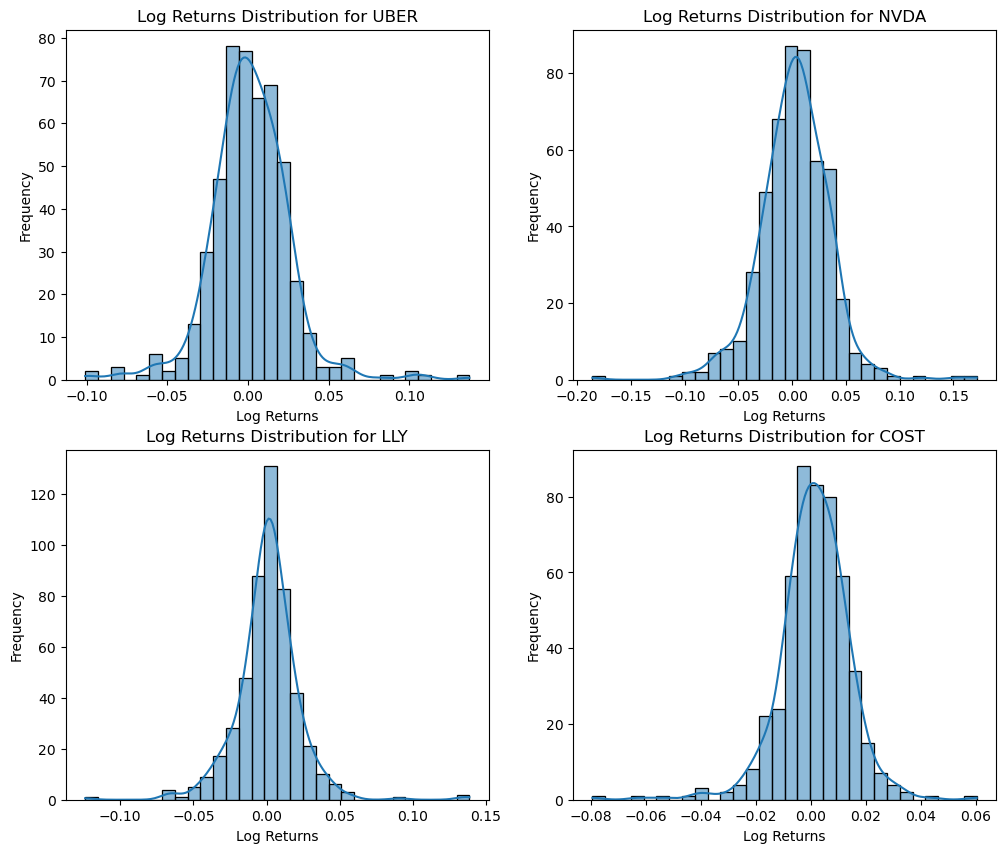

In [23]:
# Making 2*2 grid of subplots.
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, ticker in enumerate(tickers):
    ax = axes[i // 2, i % 2]
    sns.histplot(log_returns[ticker], bins=30, kde=True, ax=ax) # kde=True adds a kernel density estimate which shows a smoother distribution, hence making it easy to compare to a normal distrcution.
    ax.set_title(f'Log Returns Distribution for {ticker}')
    ax.set_xlabel('Log Returns')
    ax.set_ylabel('Frequency')

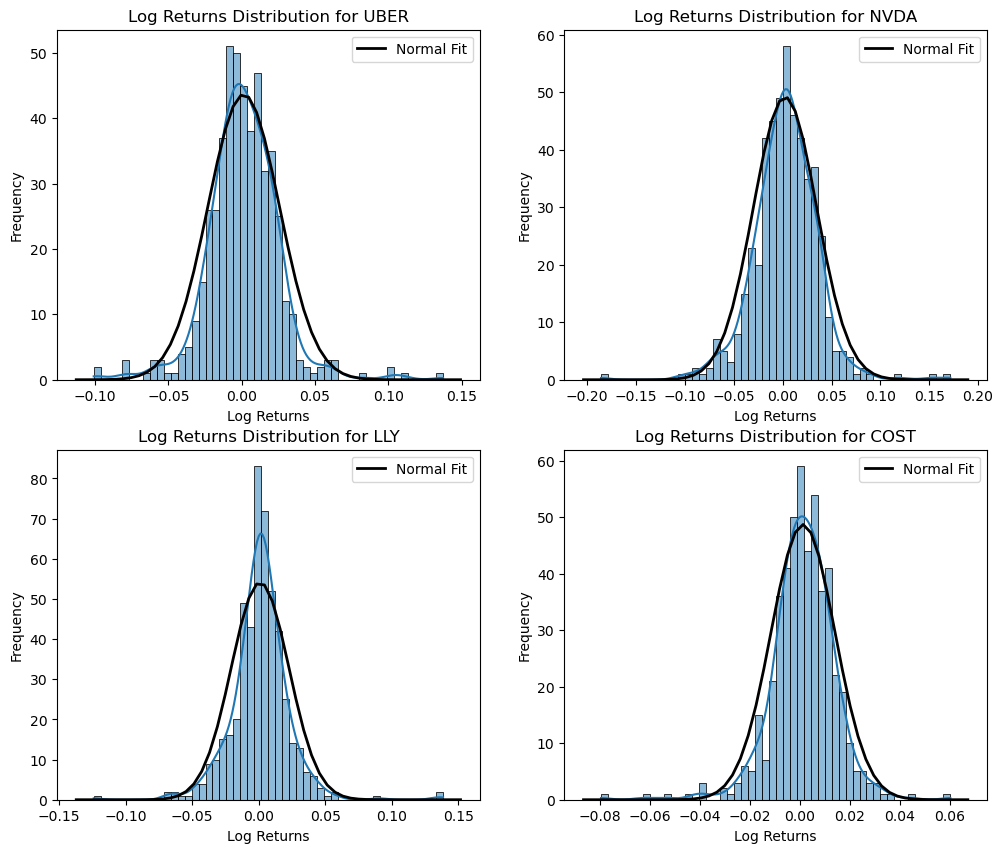

In [24]:
# Fitting a normal distribution to the log returns.
from scipy.stats import norm

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, ticker in enumerate(tickers):
    ax = axes[i // 2, i % 2]
    sns.histplot(log_returns[ticker], bins=50, kde=True, ax=ax)

    mu, std = norm.fit(log_returns[ticker])
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 50) # Choosing the number of points equal to the number of bins to make the fit over the histogram.
    p = norm.pdf(x, mu, std)
    ax.plot(x, p/p.sum() * len(log_returns), 'k', linewidth=2, label='Normal Fit') # Normalizing the PDF to match the histogram scale.
    ax.legend()

    ax.set_title(f'Log Returns Distribution for {ticker}')
    ax.set_xlabel('Log Returns')
    ax.set_ylabel('Frequency')


This shows that the log returns of these stocks are very close to a normal distribution.

It also points toward the fact that "kde" is a good qualitative measure of normality, but isn't exactly a normal distribution fitting.

This fitting indicates that with a large enough sample size (2 years of trading), the log returns of these stocks will be normally distributed.

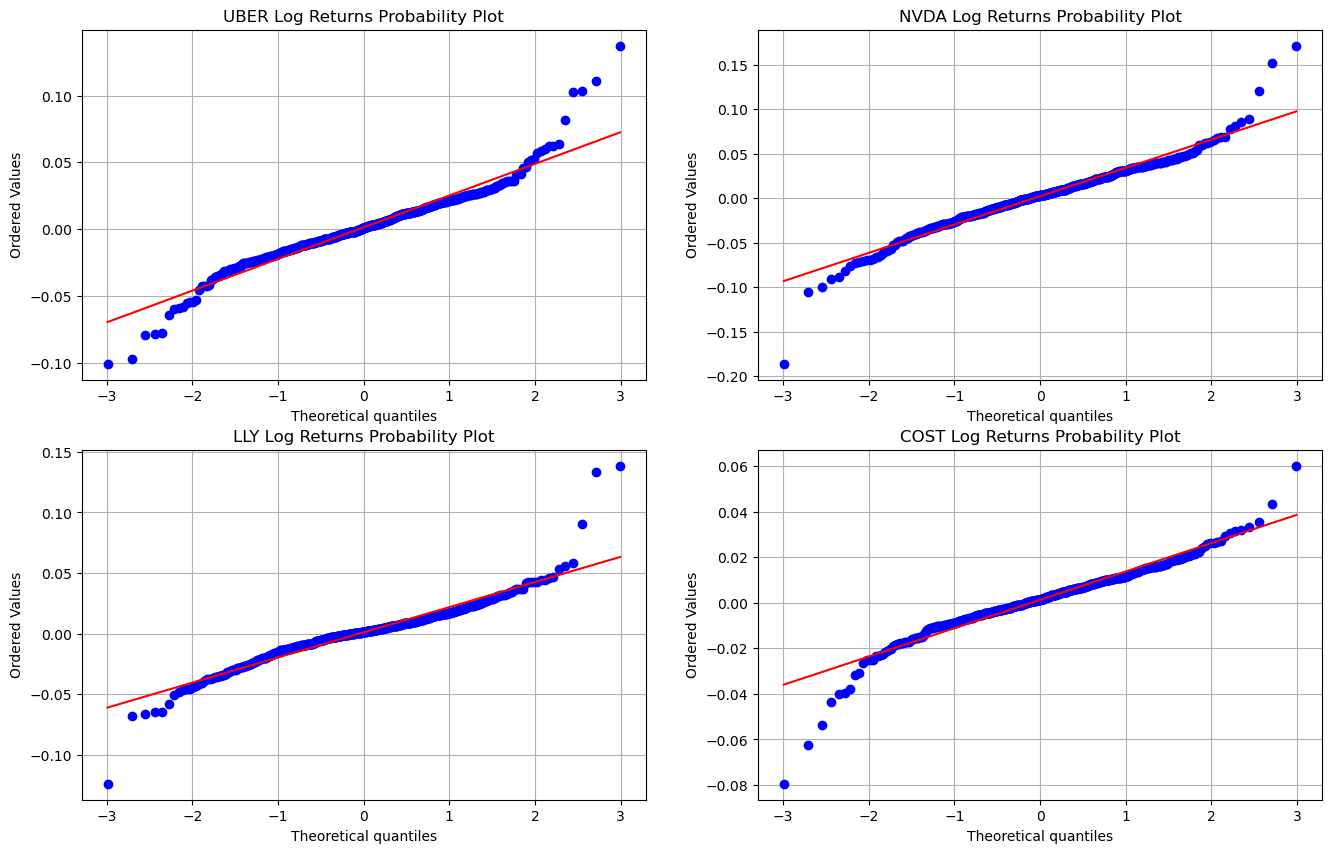

In [25]:
from scipy import stats
# Create 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for i, ticker in enumerate(tickers):
    stats.probplot(log_returns[ticker].values, dist="norm", plot=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{ticker} Log Returns Probability Plot')
    axes[i // 2, i % 2].grid(True)

plt.show()

In [26]:
for ticker in tickers:
    #Collect p-values of normality tests
    p_ticker=stats.normaltest(log_returns[ticker])[1]

    #Print evidence/non-evidence of normality
    print(f"{ticker} log return distribution: p-value = {p_ticker:.4f}")
    if p_ticker < 0.05:
        print("→ Statistically significant evidence that the data is NOT normally distributed.")
    else:
        print("→ No statistically significant evidence against normality.")

    print('--'*40) 
    print('--'*40) 

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

In [27]:
# This is surprising, the figures showed some evidence of normality, but the statistical tests show that we cannot reject the null hypothesis of normality for these stocks.

# 1) Let's check if we can see this in a smaller time period.

In [28]:
# One can pick specific periods of time and see how the stocks behaved, e.g., particular months in 2024 or election period.
# The way I am doing it is by getting specific periods away from today's data, i.e., data till 3 months ago, 6 months ago, 1 year ago, etc...

[*********************100%***********************]  4 of 4 completed


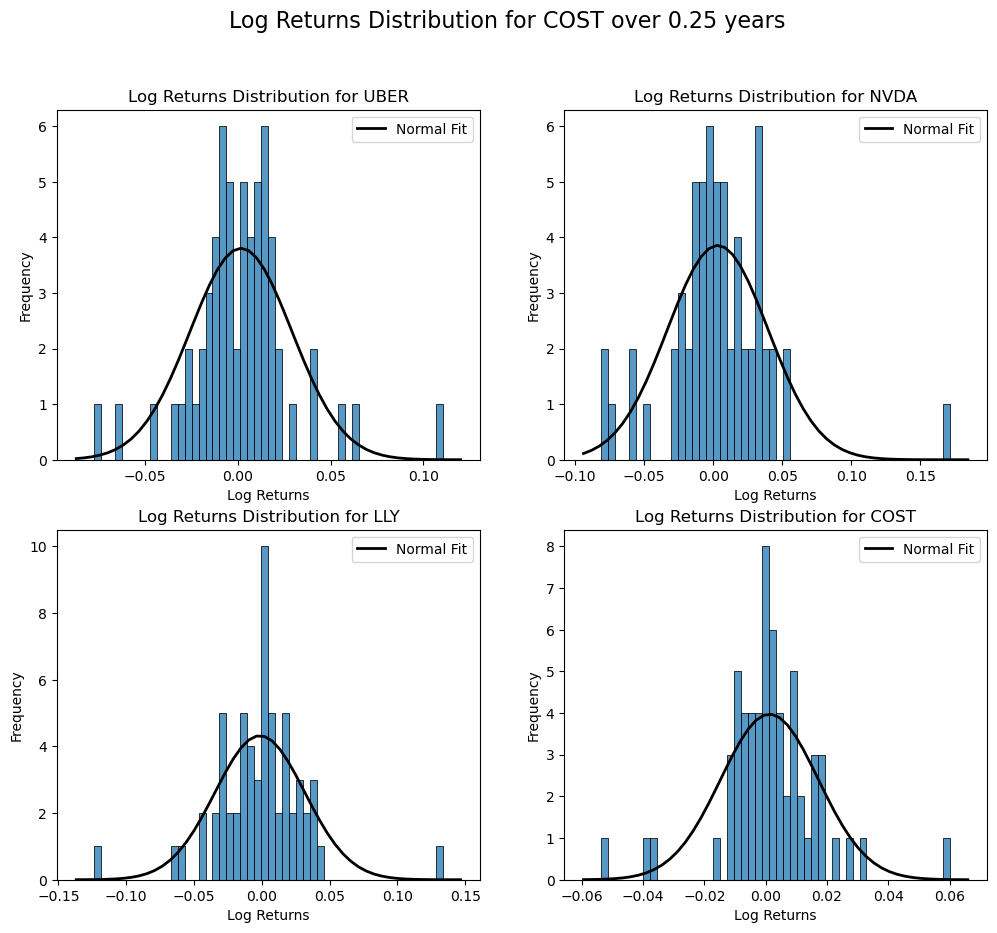

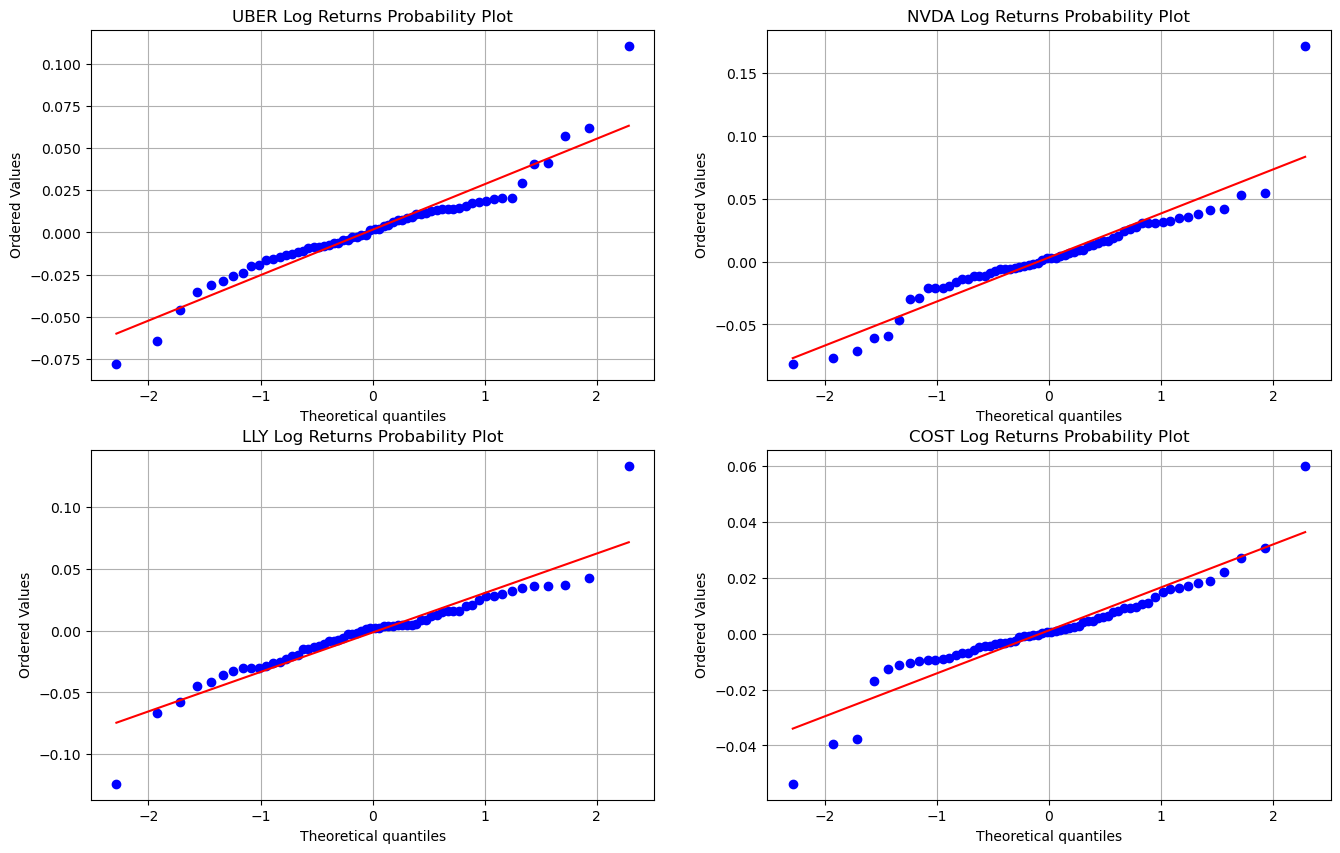

UBER log return distribution: p-value = 0.0004
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0005
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0018
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


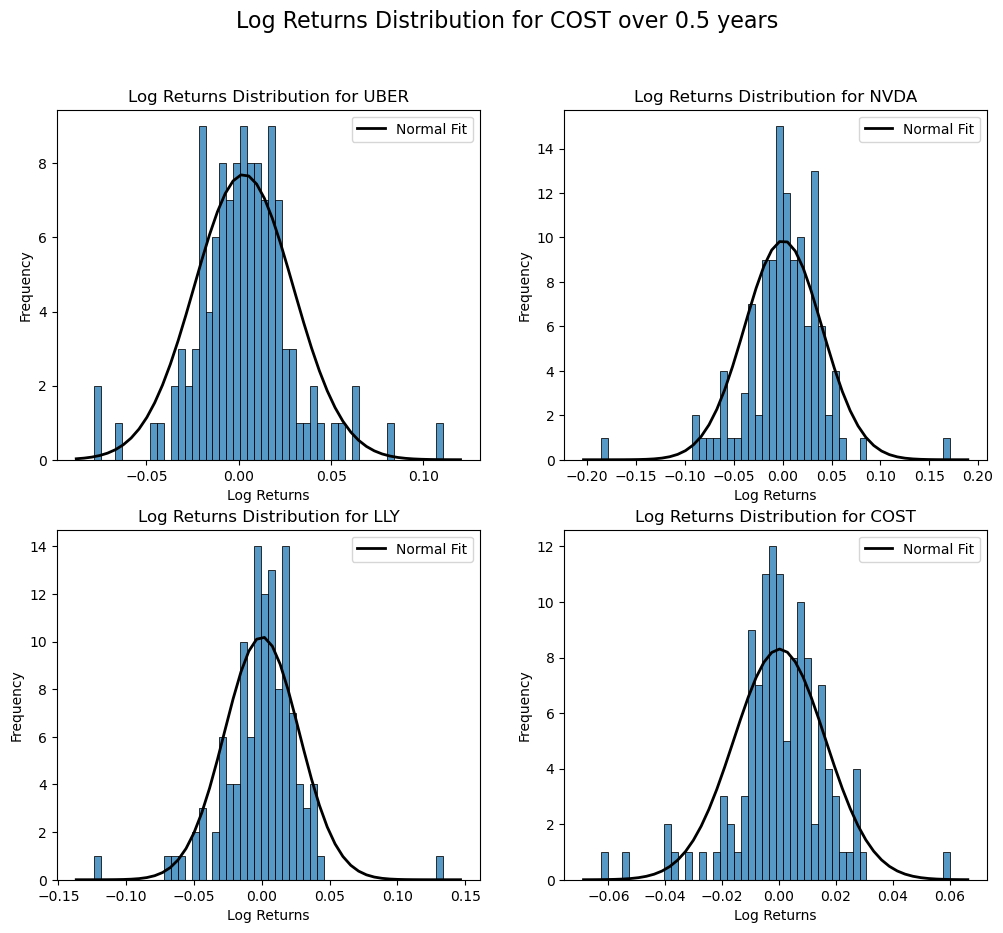

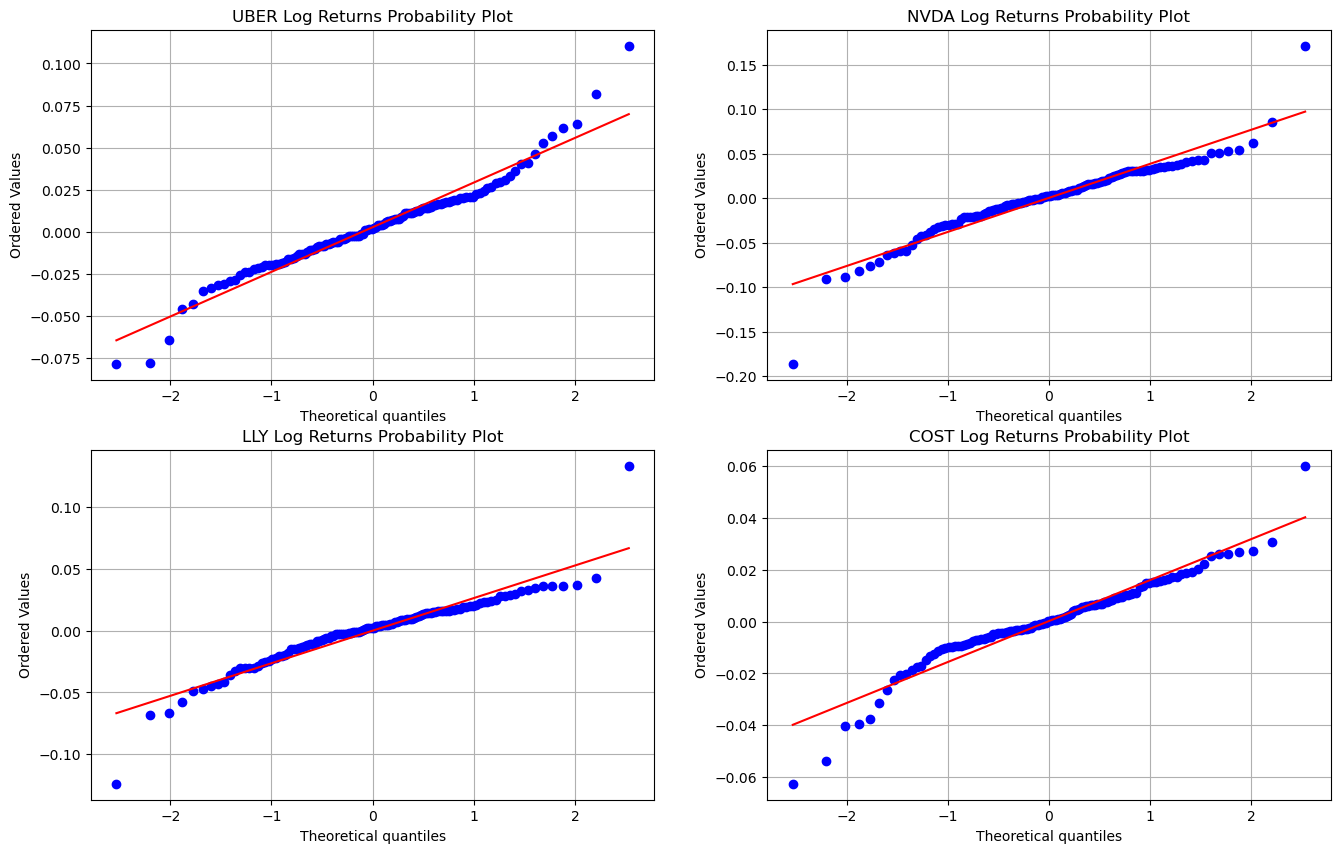

UBER log return distribution: p-value = 0.0005
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


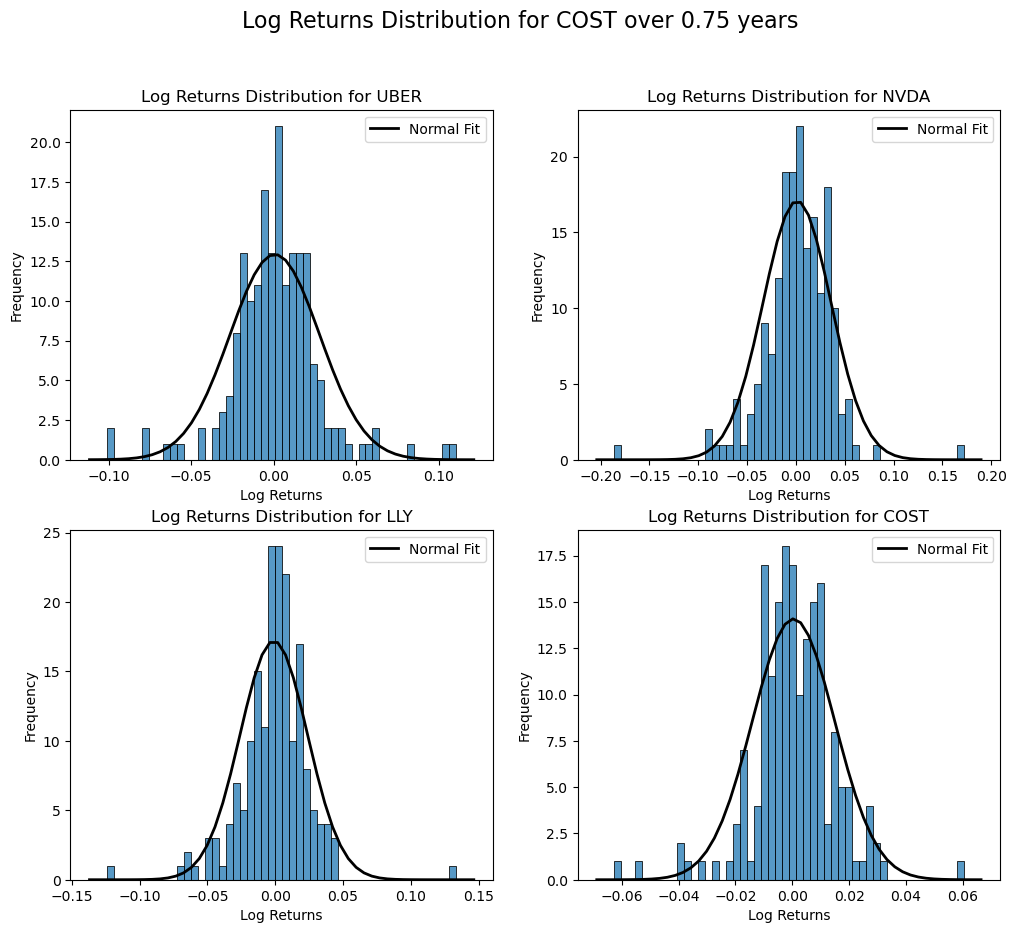

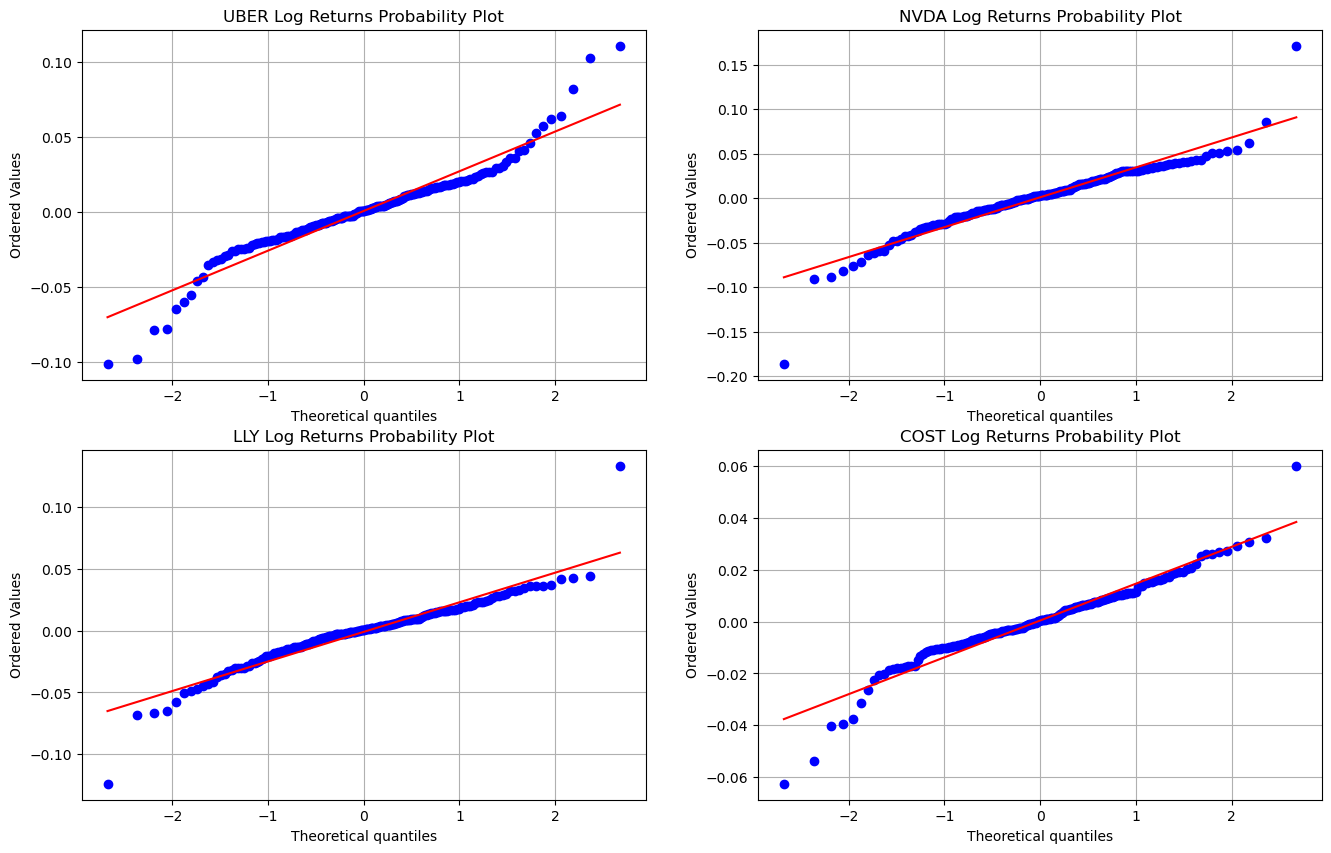

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


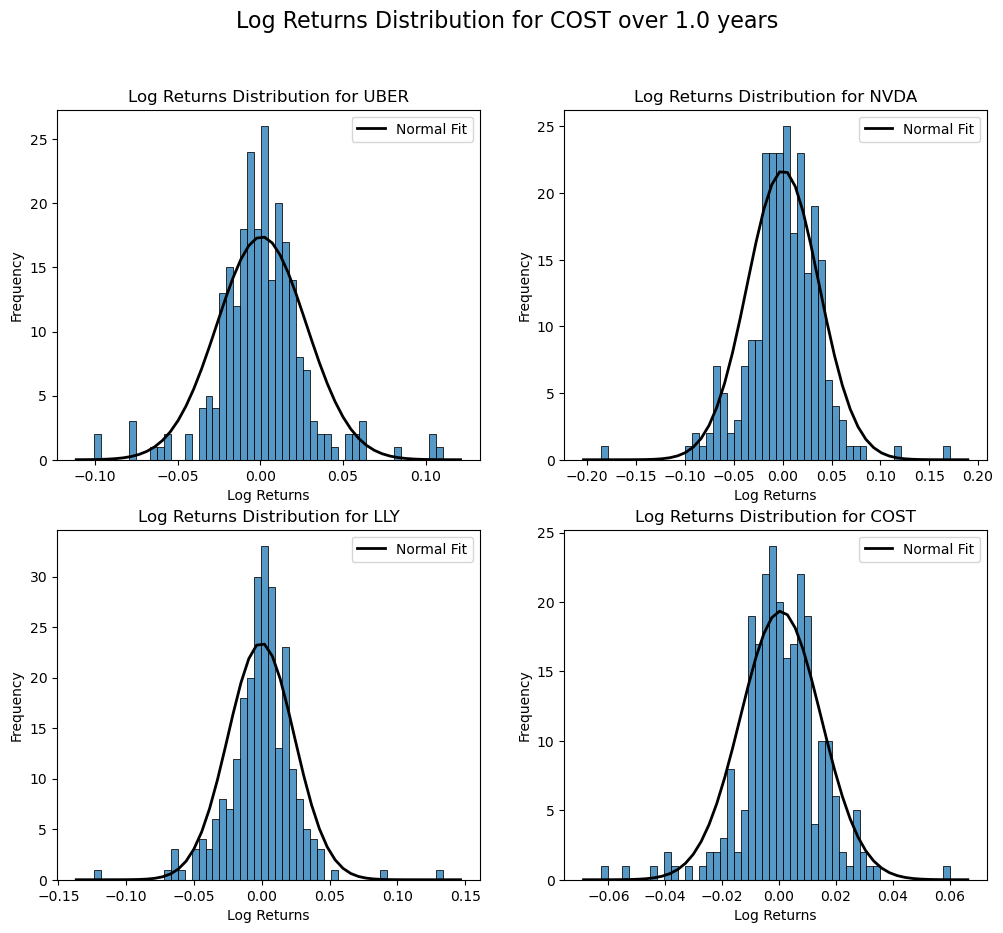

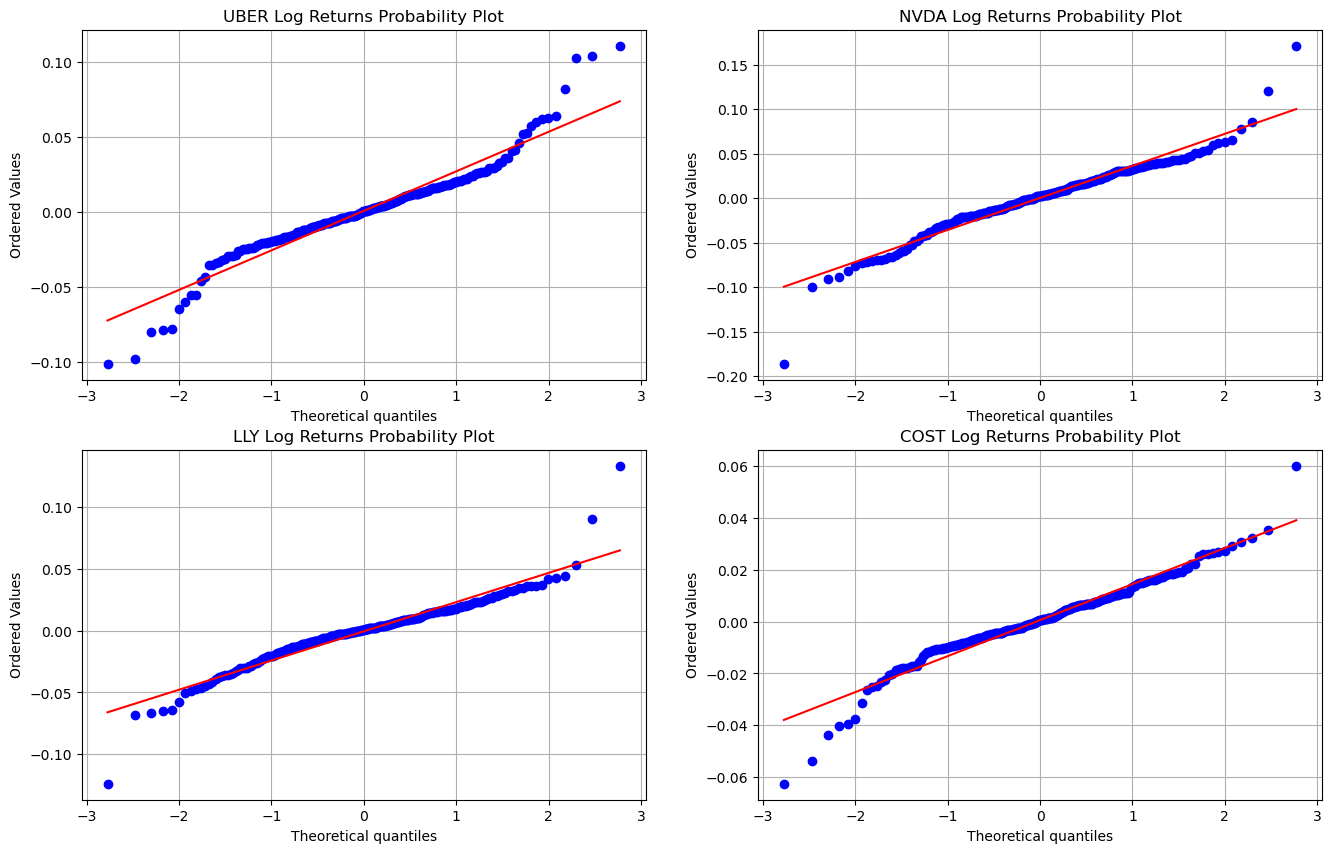

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


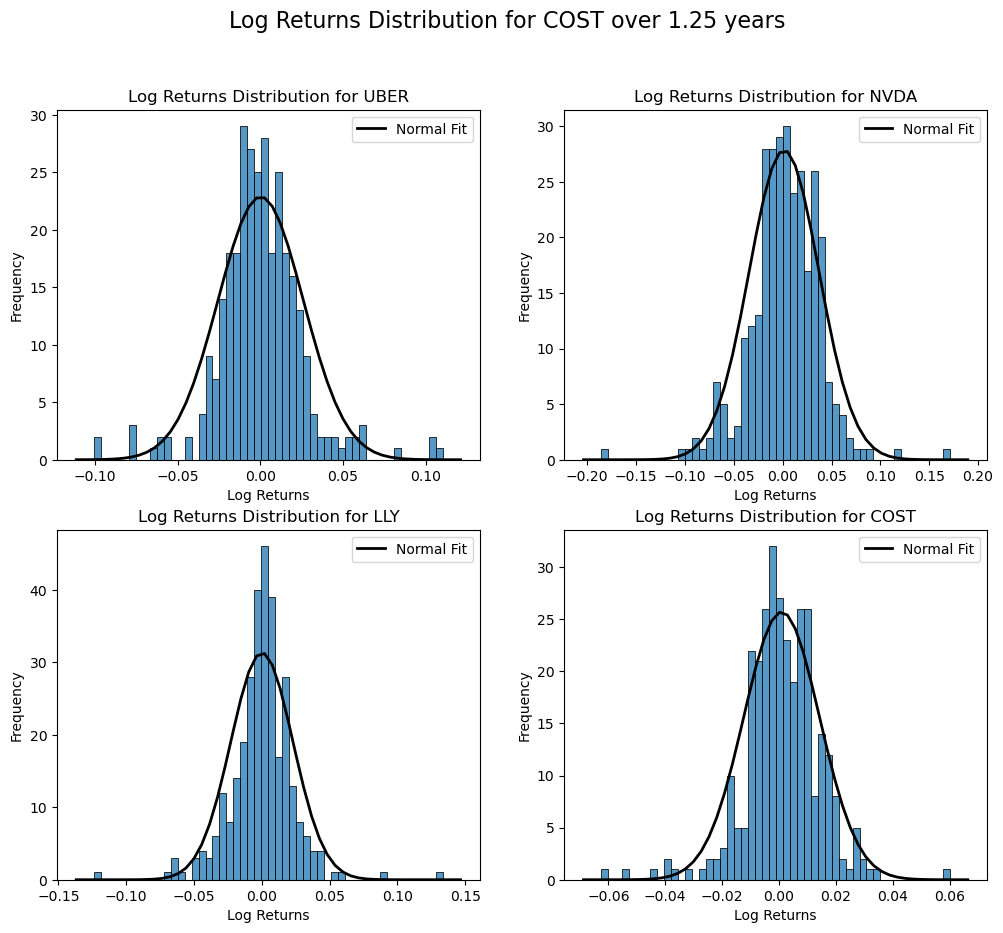

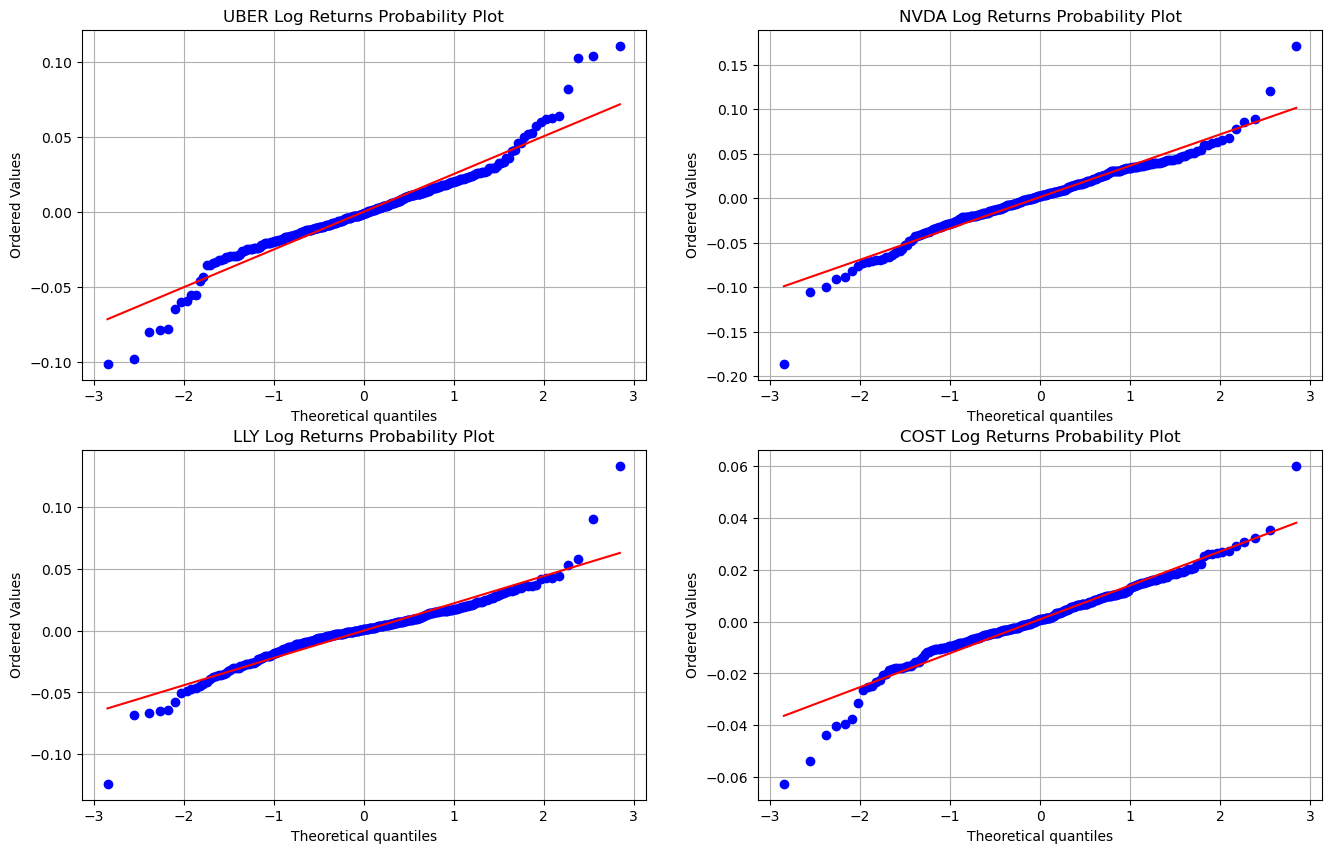

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


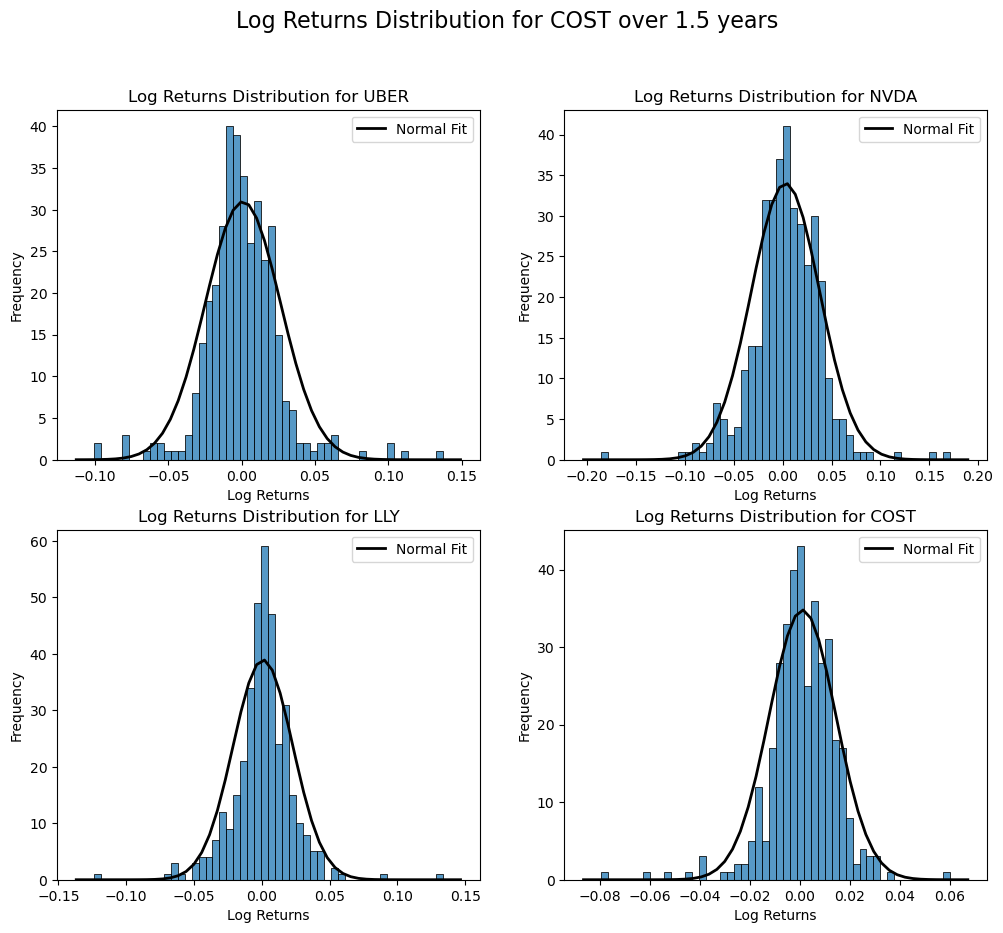

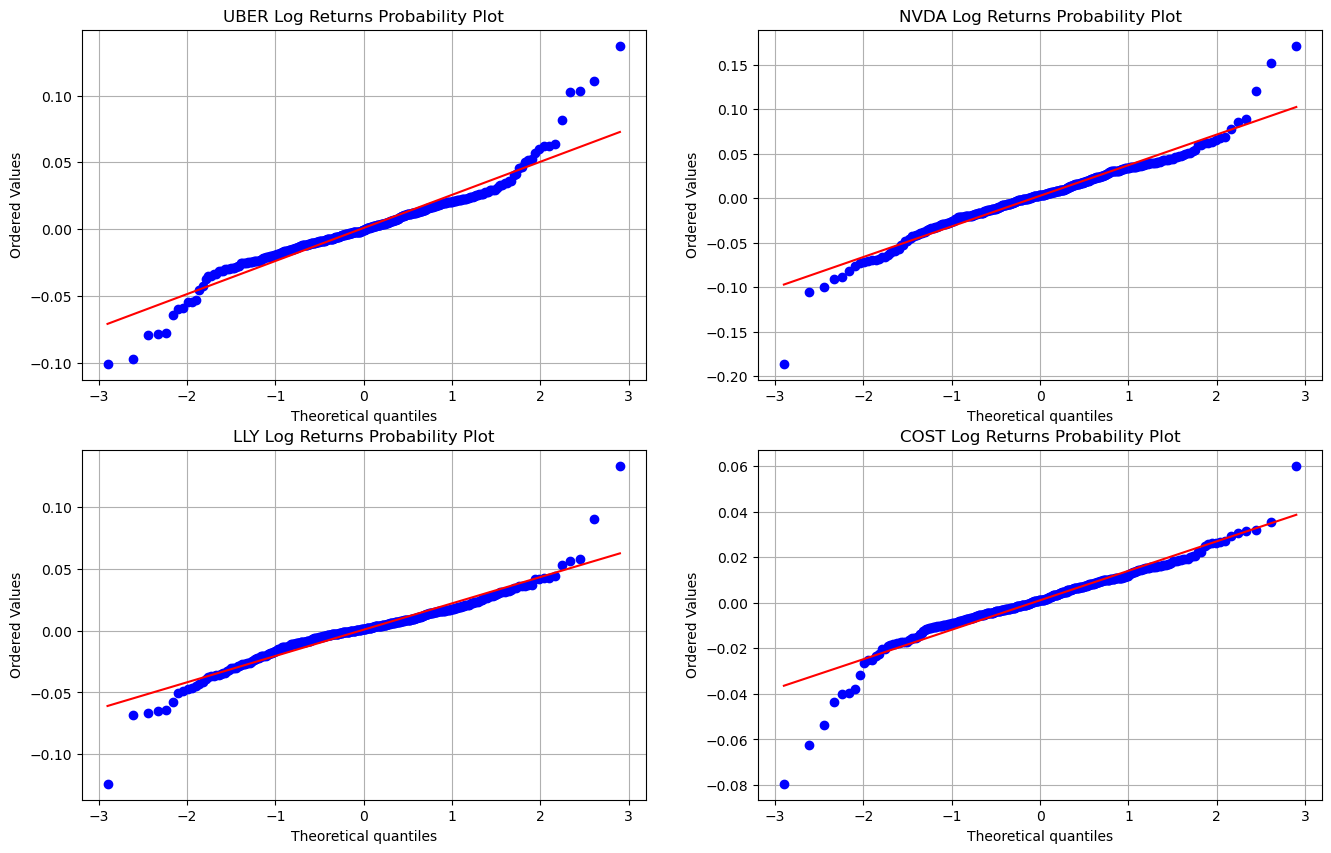

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


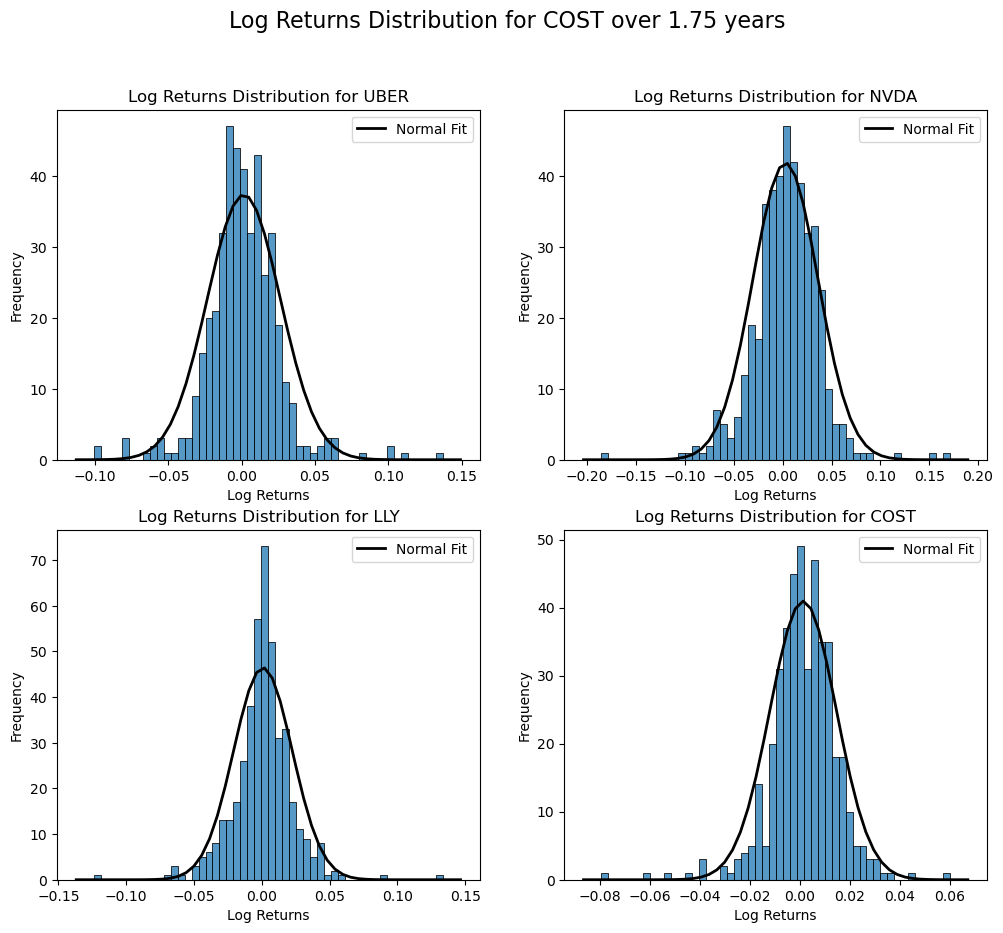

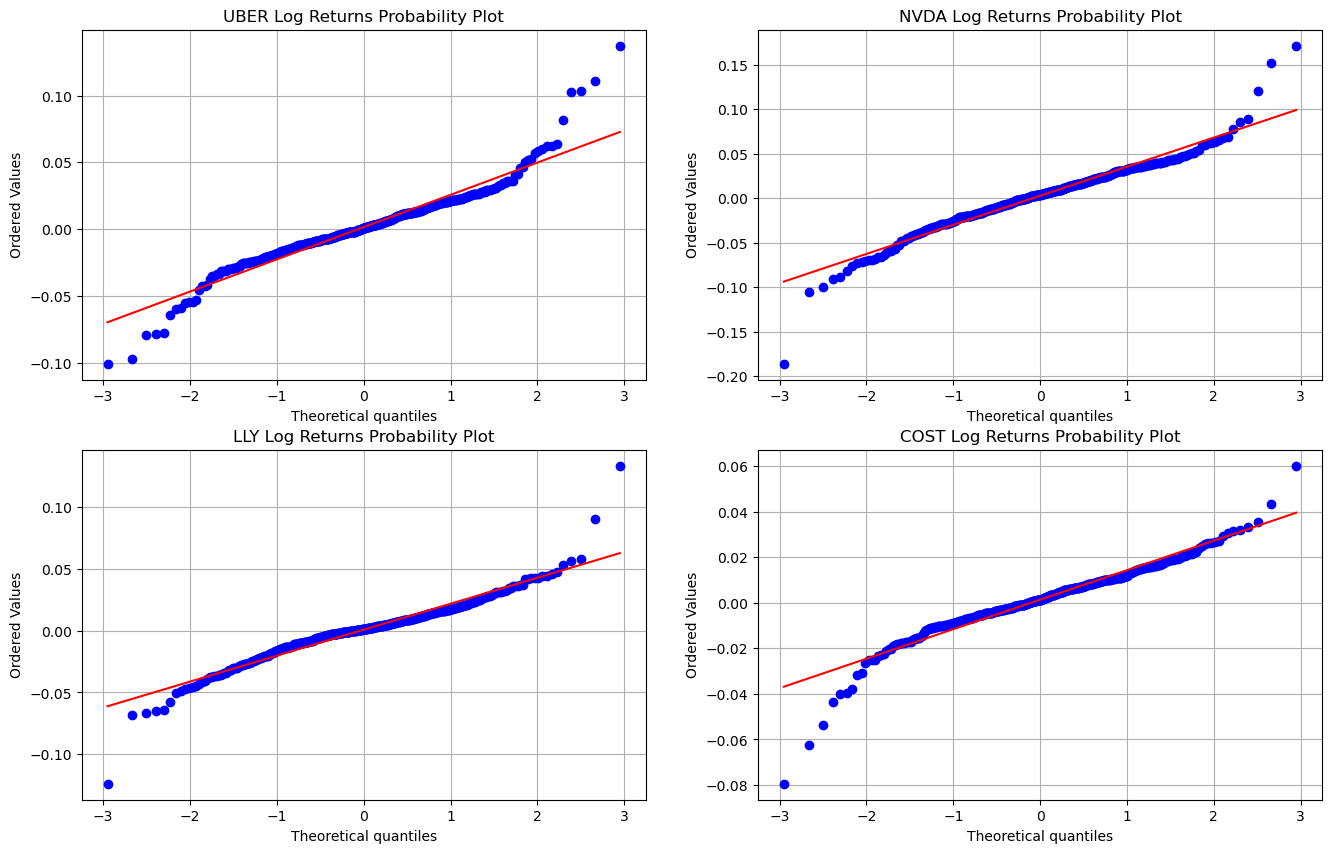

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


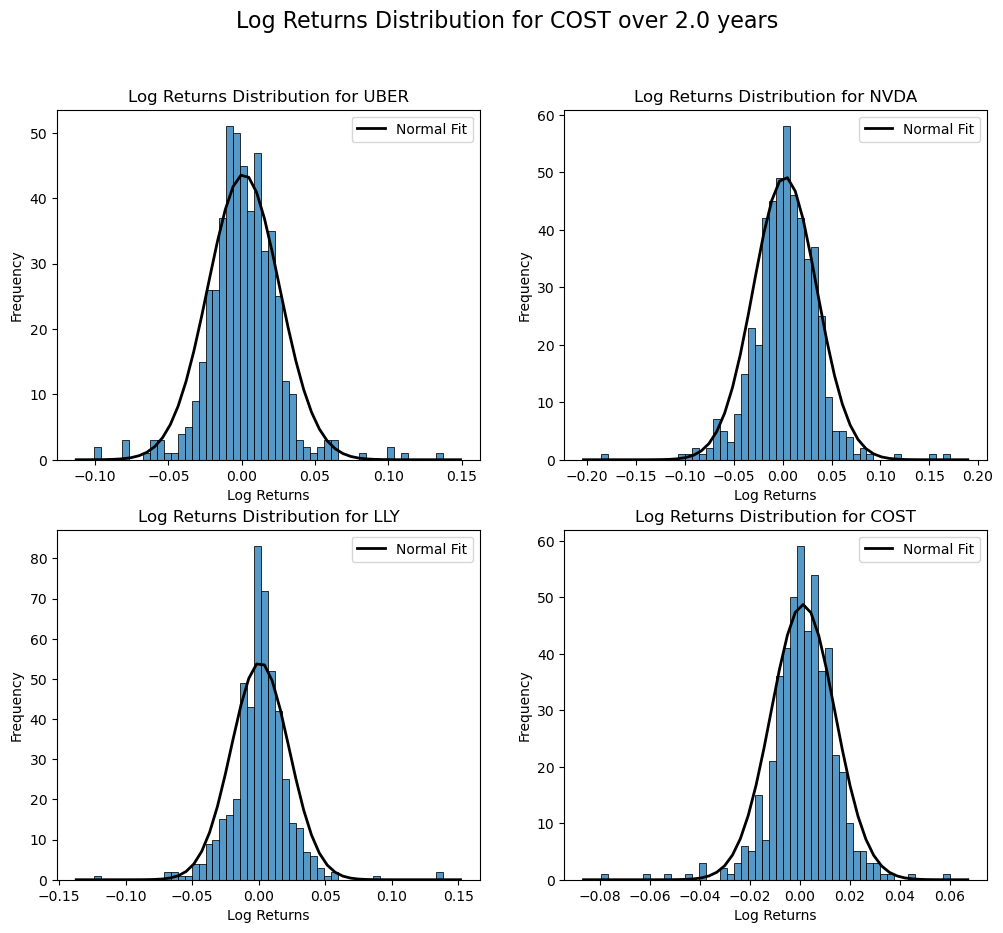

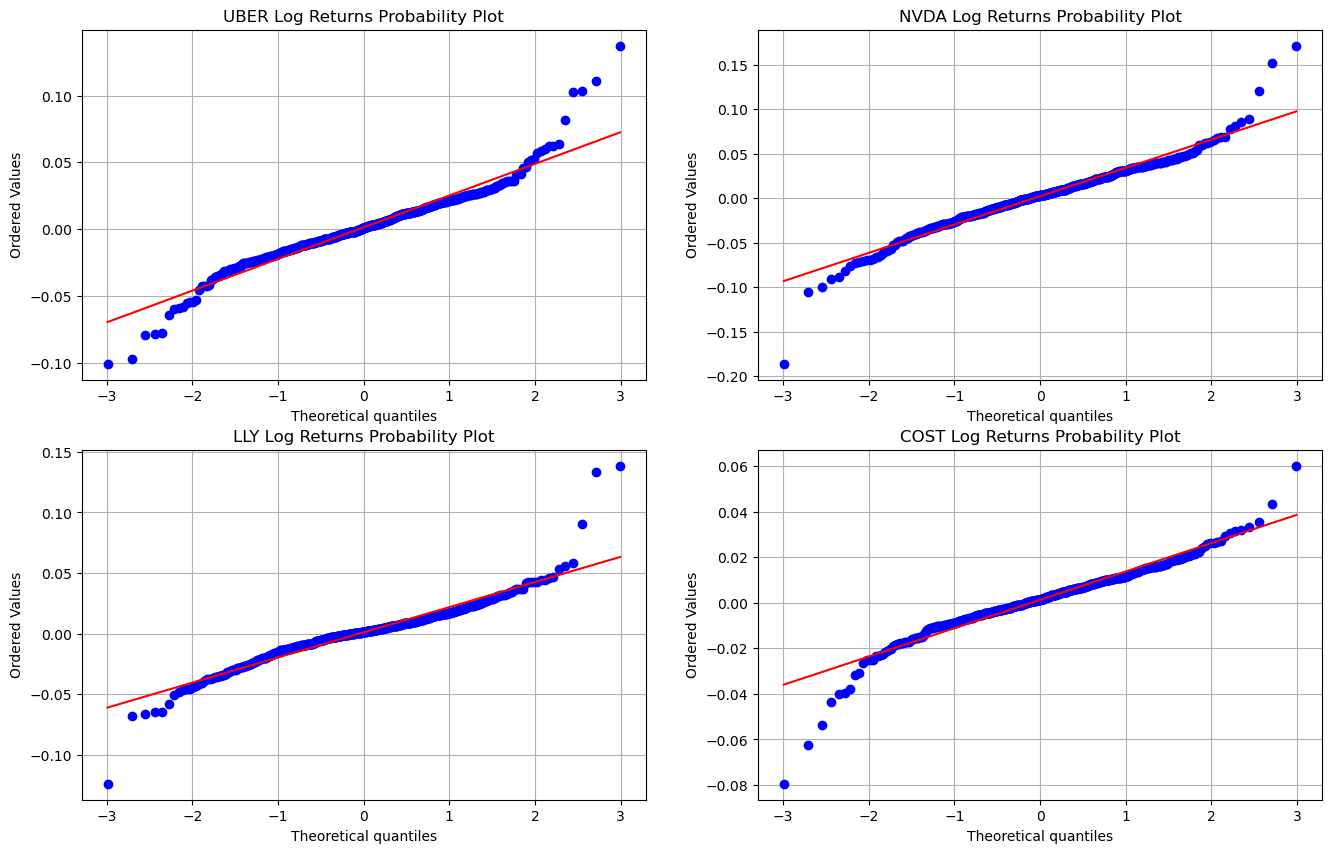

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

In [31]:
for n in range(1,9): 
   # Focusing on shorter periods of trading dates of data to see trends.
    start_date = dt.datetime.today()-dt.timedelta(days = 365 * n/4)
    end_date = dt.datetime.today()

    stock = yf.download(tickers, start = start_date, end = end_date)
    log_returns = np.log(stock['Close'] / stock['Close'].shift(1)).dropna()

    # Fitting a normal distribution to the log returns.
    from scipy.stats import norm

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    for i, ticker in enumerate(tickers):
        ax = axes[i // 2, i % 2]
        sns.histplot(log_returns[ticker], bins=50, ax=ax)

        mu, std = norm.fit(log_returns[ticker])
        xmin, xmax = ax.get_xlim()
        x = np.linspace(xmin, xmax, 50) # Choosing the number of points equal to the number of bins to make the fit over the histogram.
        p = norm.pdf(x, mu, std)
        ax.plot(x, p/p.sum() * len(log_returns), 'k', linewidth=2, label='Normal Fit') # Normalizing the PDF to match the histogram scale.
        ax.legend()

        ax.set_title(f'Log Returns Distribution for {ticker}')
        ax.set_xlabel('Log Returns')
        ax.set_ylabel('Frequency')
        fig.suptitle(f'Log Returns Distribution for {ticker} over {n/4} years', fontsize=16)

    from scipy import stats
    # Create 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    for i, ticker in enumerate(tickers):
        stats.probplot(log_returns[ticker].values, dist="norm", plot=axes[i // 2, i % 2])
        axes[i // 2, i % 2].set_title(f'{ticker} Log Returns Probability Plot')
        axes[i // 2, i % 2].grid(True)

    plt.show()

    for ticker in tickers:
        #Collect p-values of normality tests
        p_ticker=stats.normaltest(log_returns[ticker])[1]

        #Print evidence/non-evidence of normality
        print(f"{ticker} log return distribution: p-value = {p_ticker:.4f}")
        if p_ticker < 0.05:
            print("→ Statistically significant evidence that the data is NOT normally distributed.")
        else:
            print("→ No statistically significant evidence against normality.")

        print('--'*40) 
        print('--'*40) 


Even though it's possible to fit a normal distribution to log return, it's not always the case that the original data/histogram is normally distributed.

For this choice of stocks, one can see evidence of normality for longer time periods (+1 year).

# 2) Let's remove some extreme data points and see if we can achieve normality on a smaller time scale.

We identify an extreme point as a change of +10% in one trading day, |log_return|<0.1.

[*********************100%***********************]  4 of 4 completed


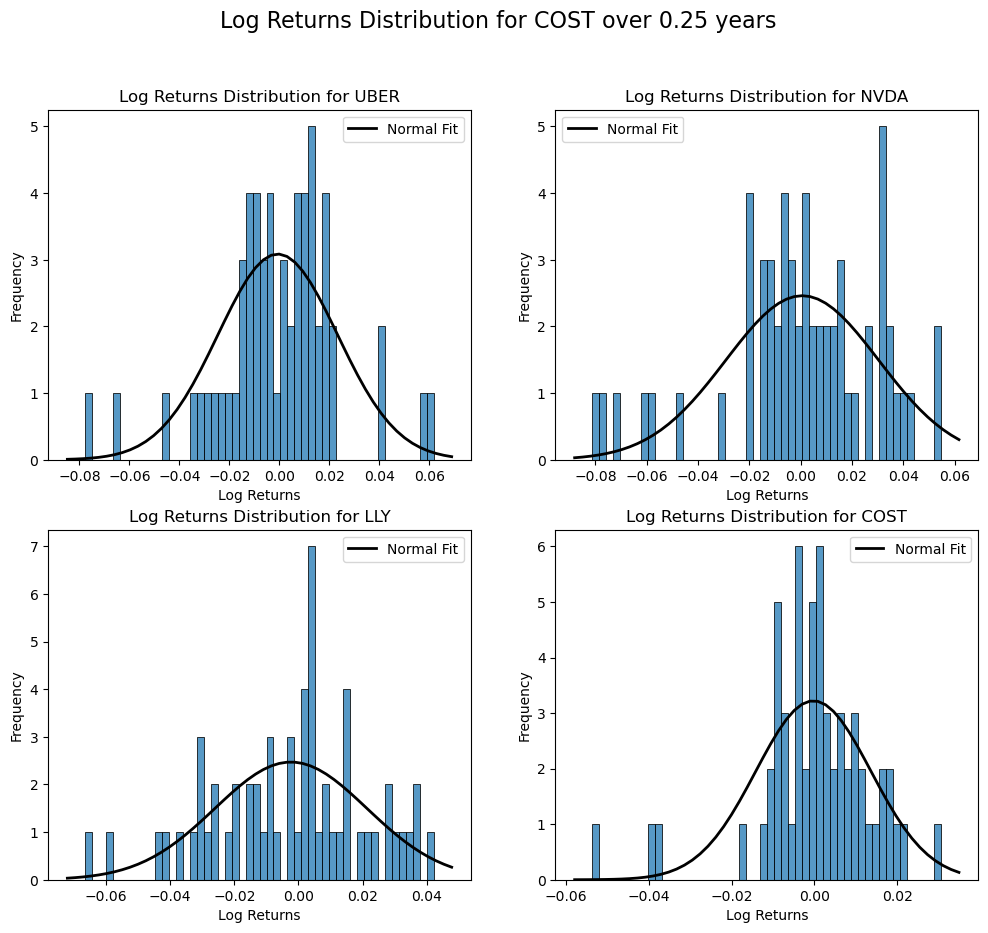

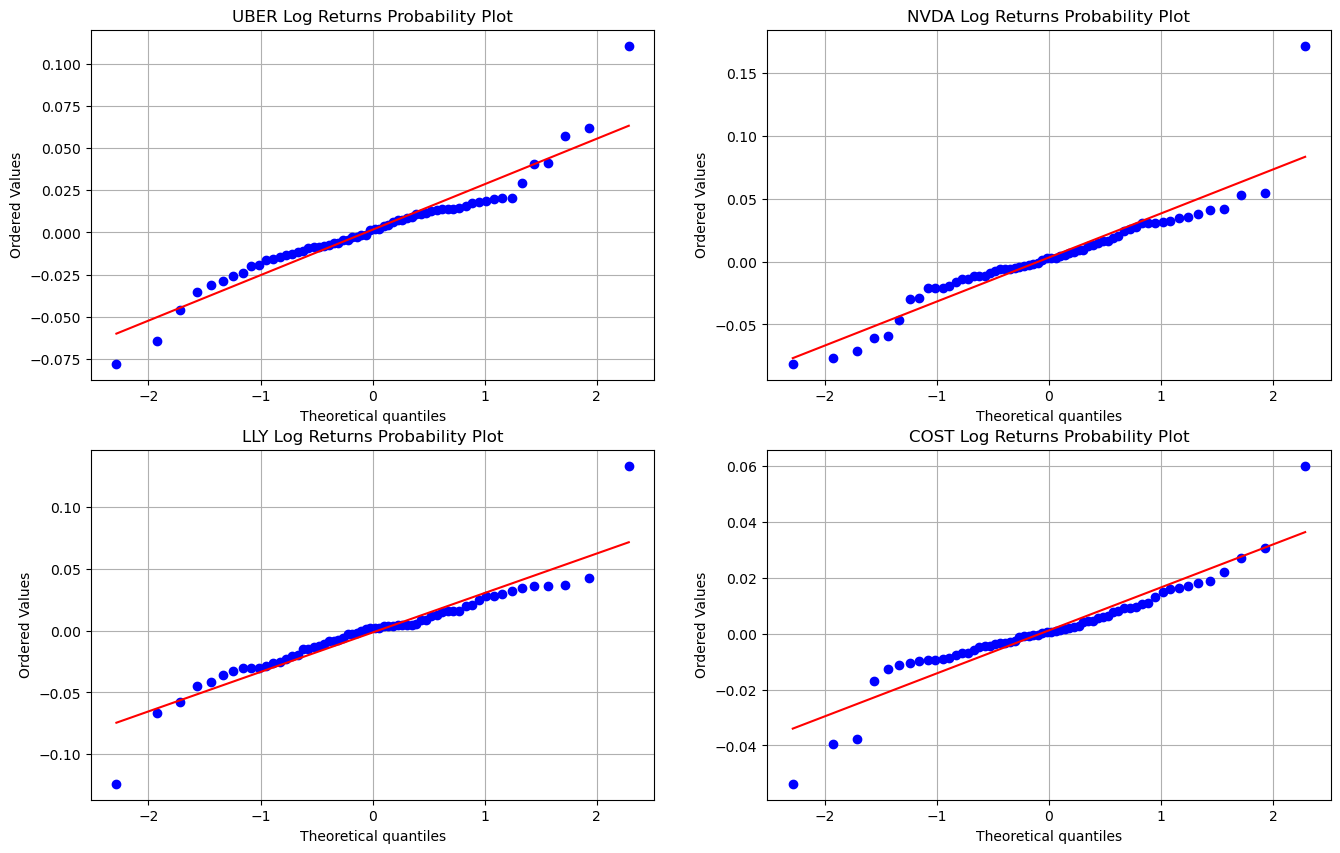

UBER log return distribution: p-value = 0.0004
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0005
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0018
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


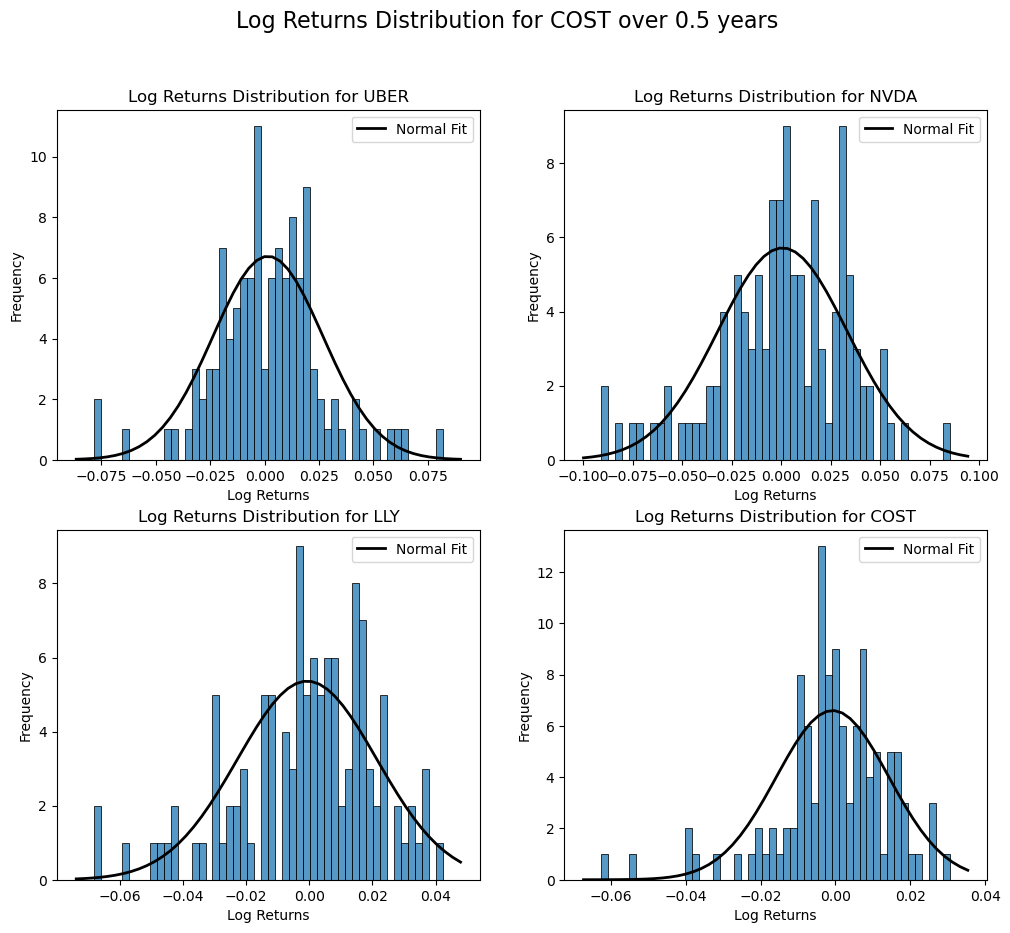

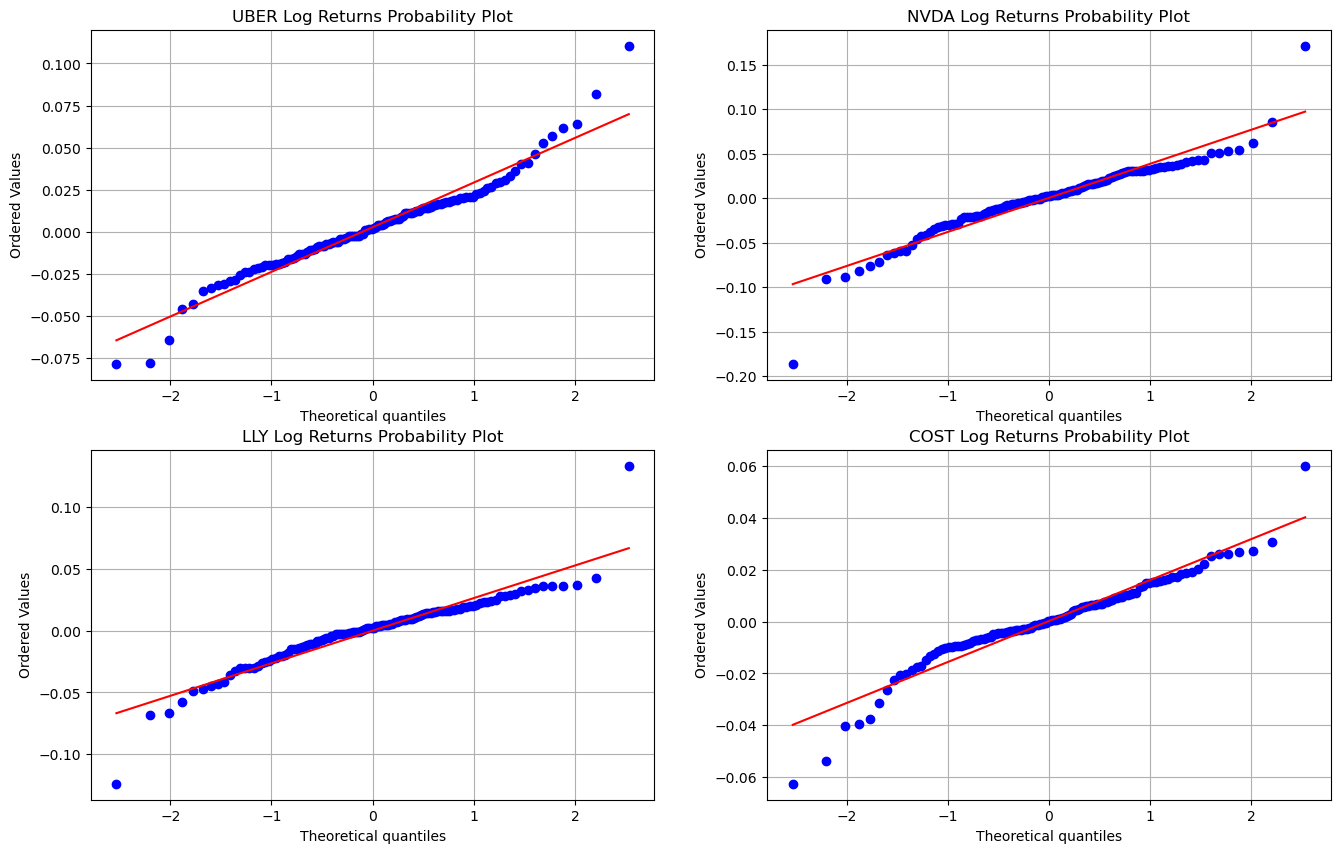

UBER log return distribution: p-value = 0.0005
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


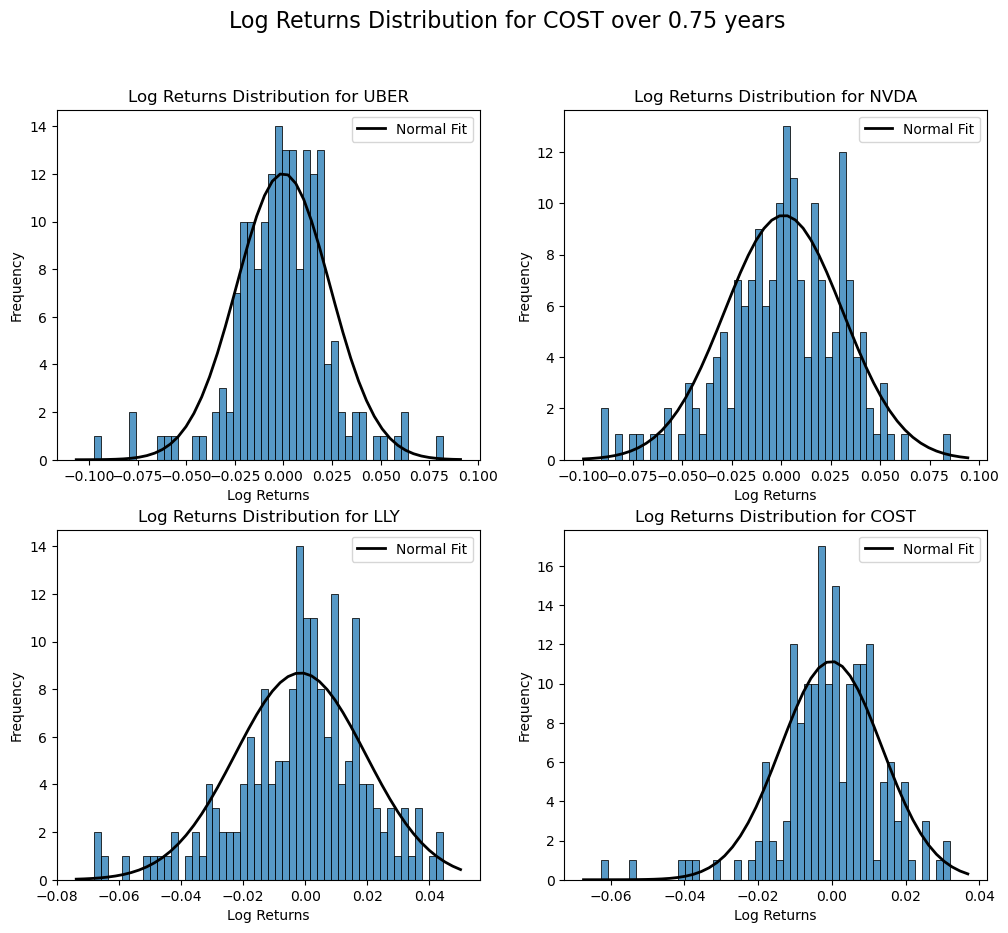

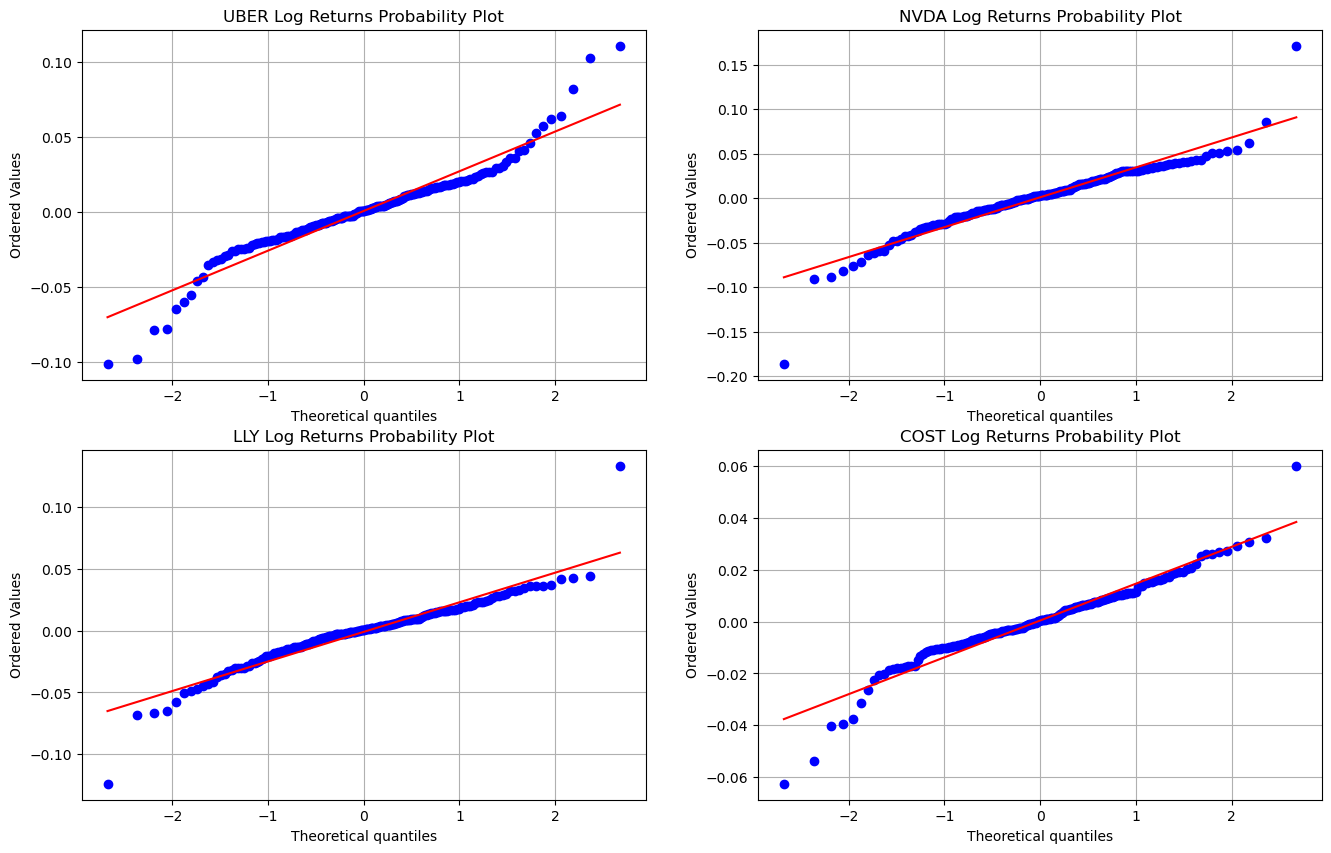

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


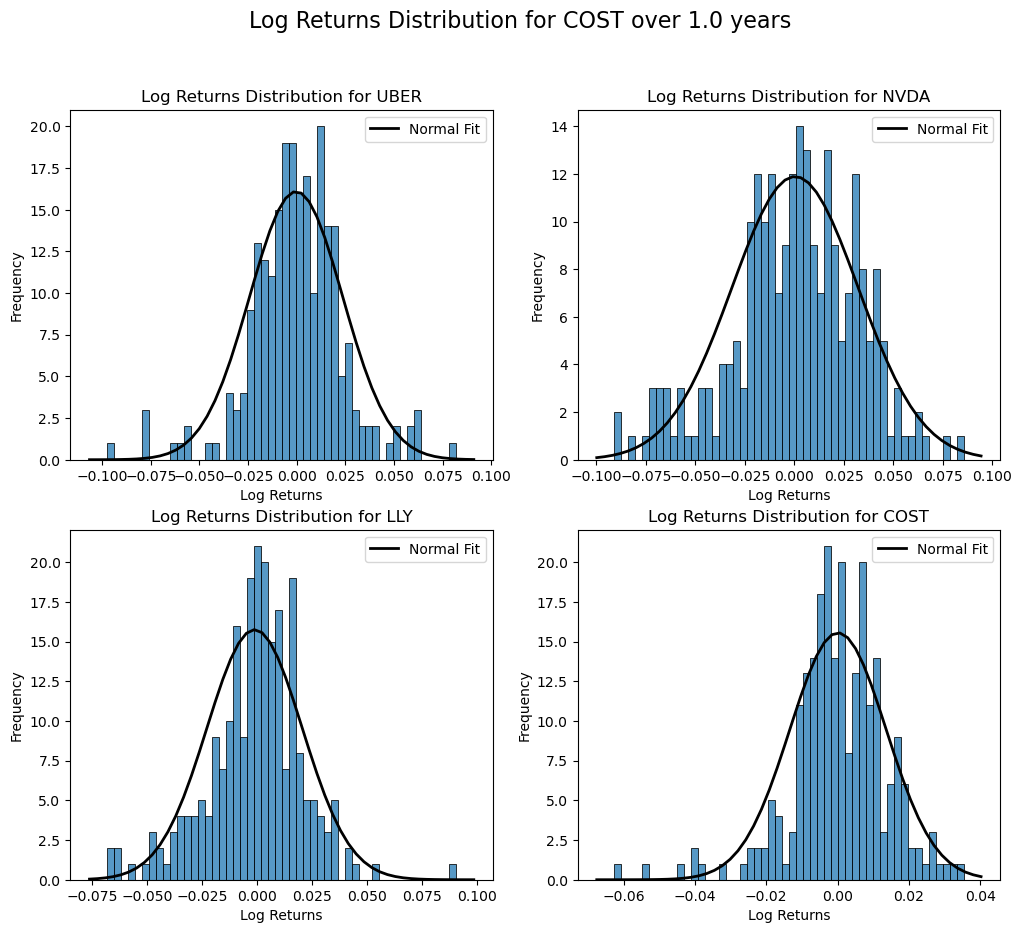

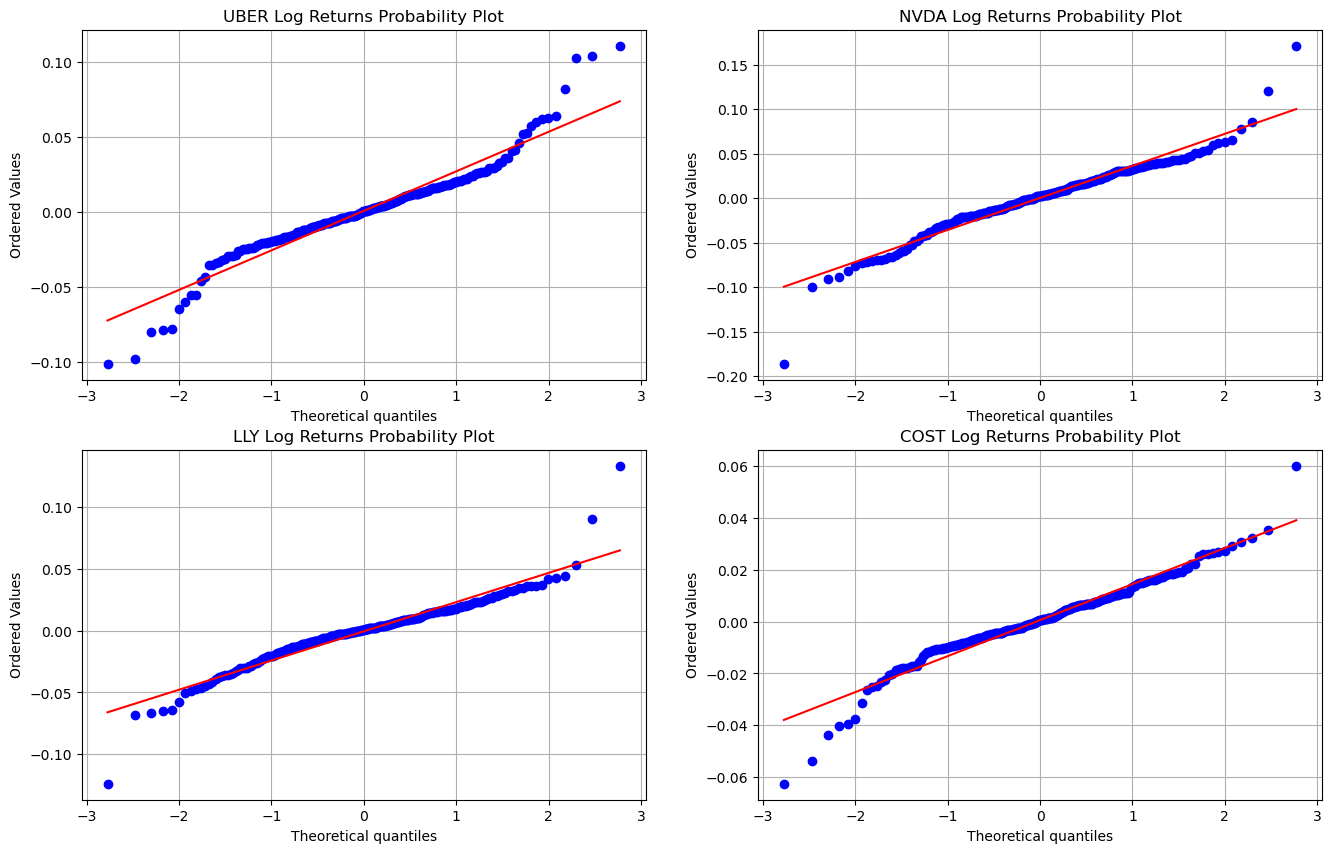

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


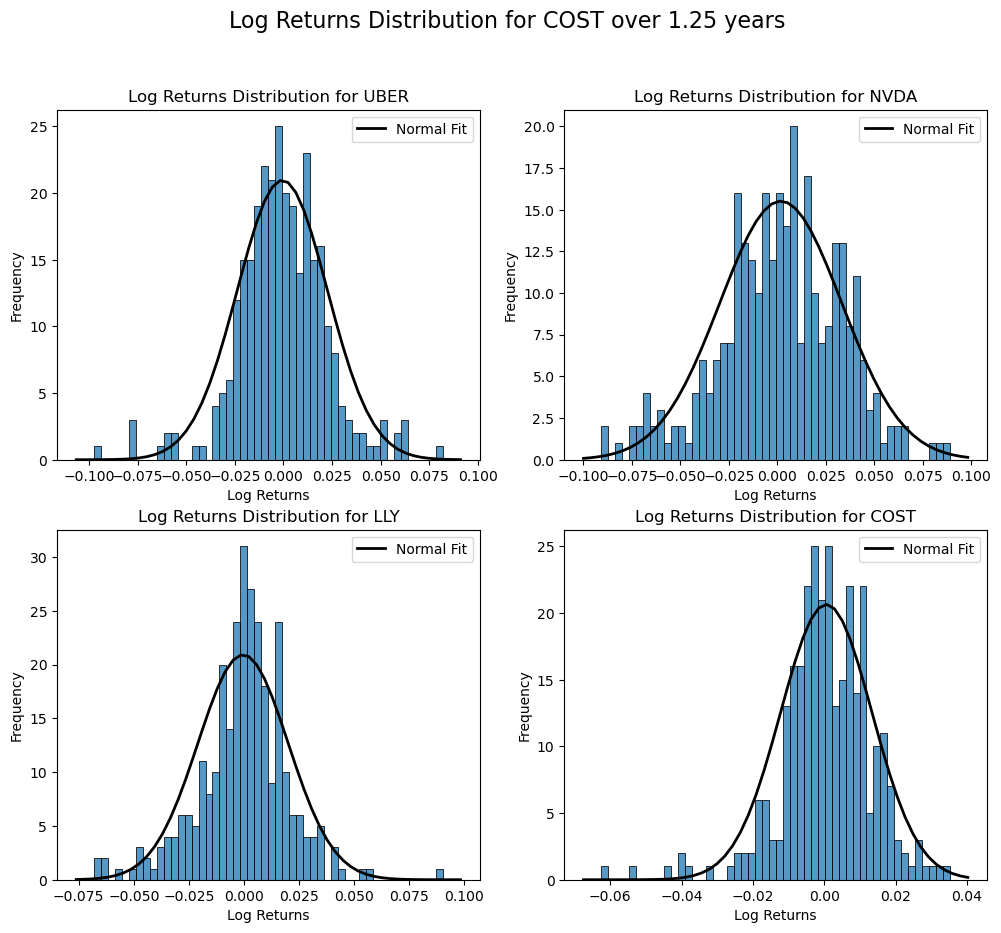

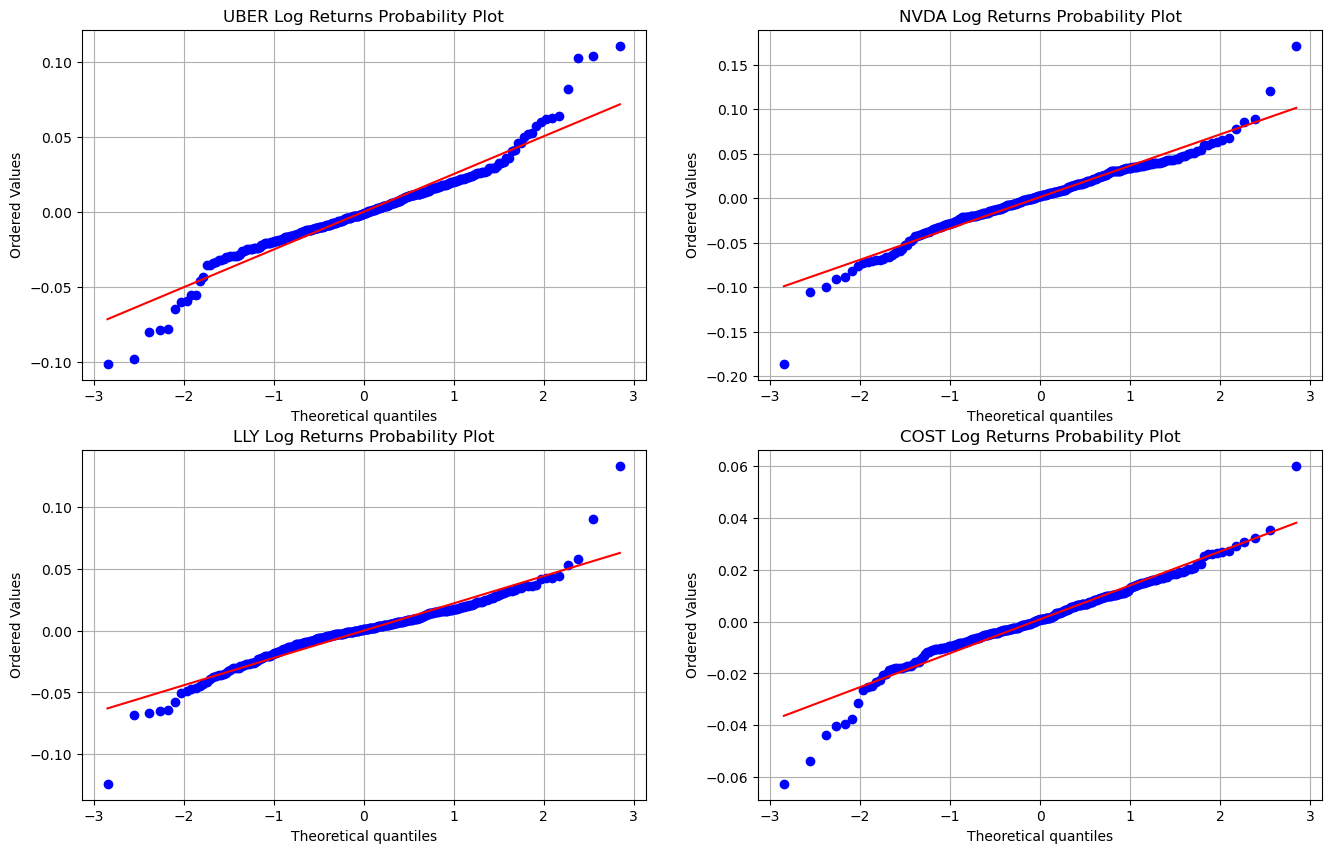

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


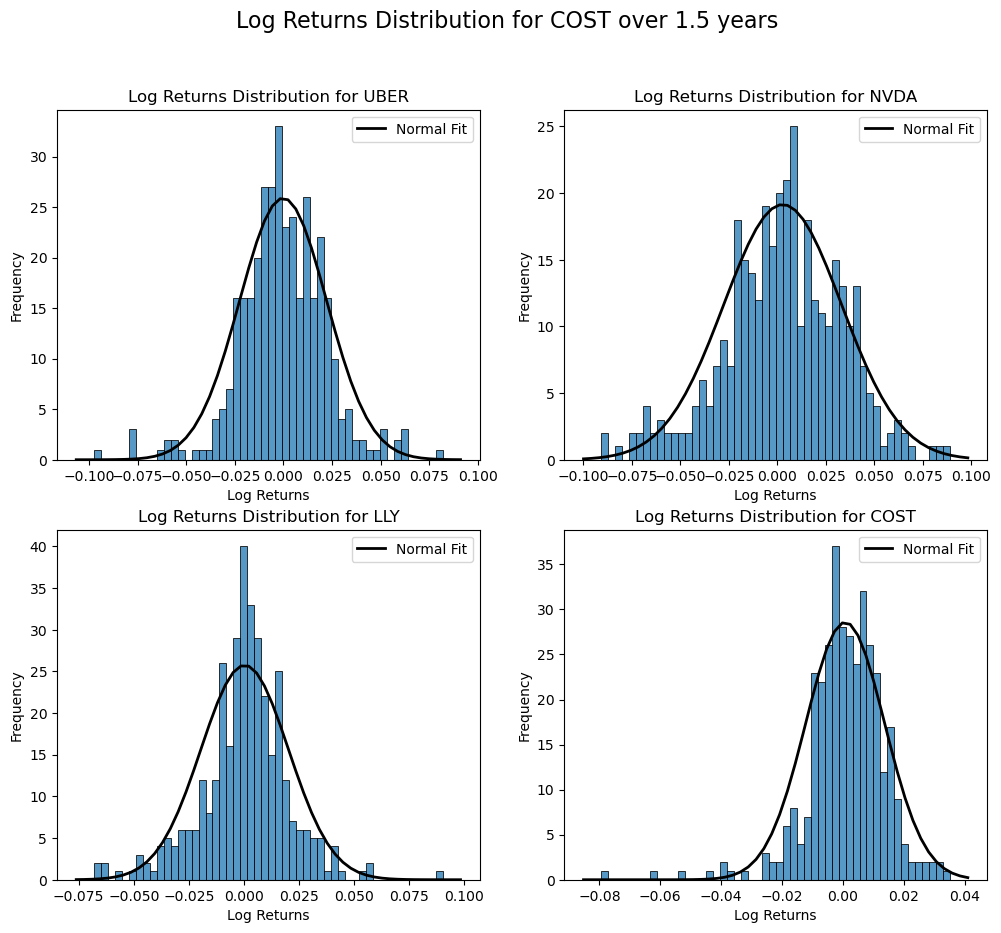

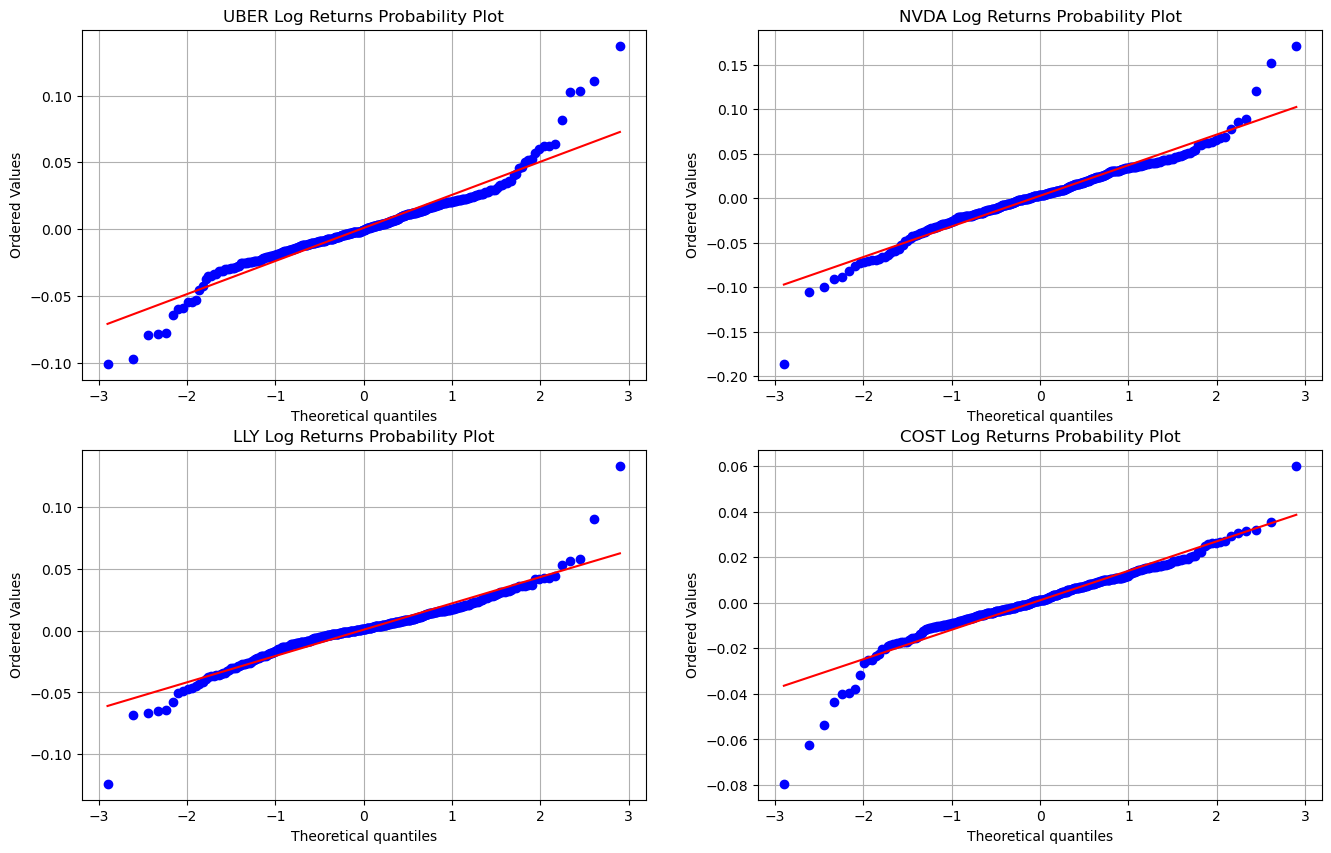

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


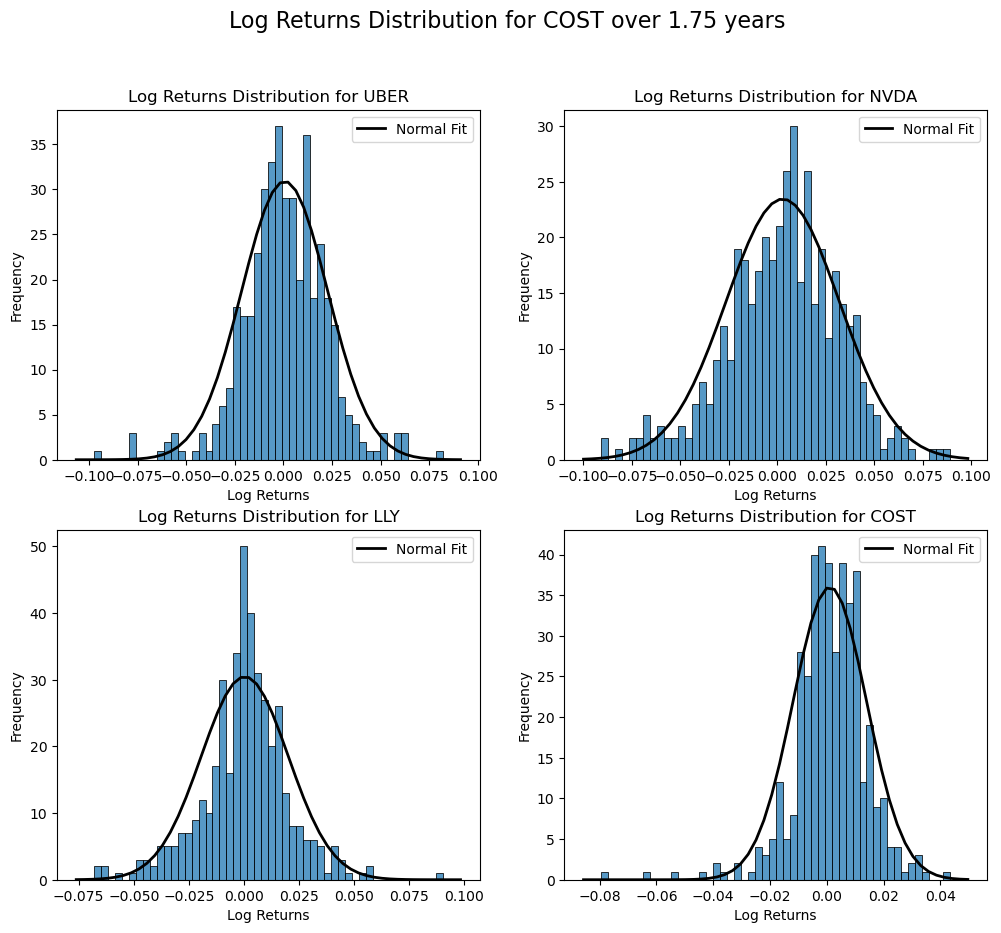

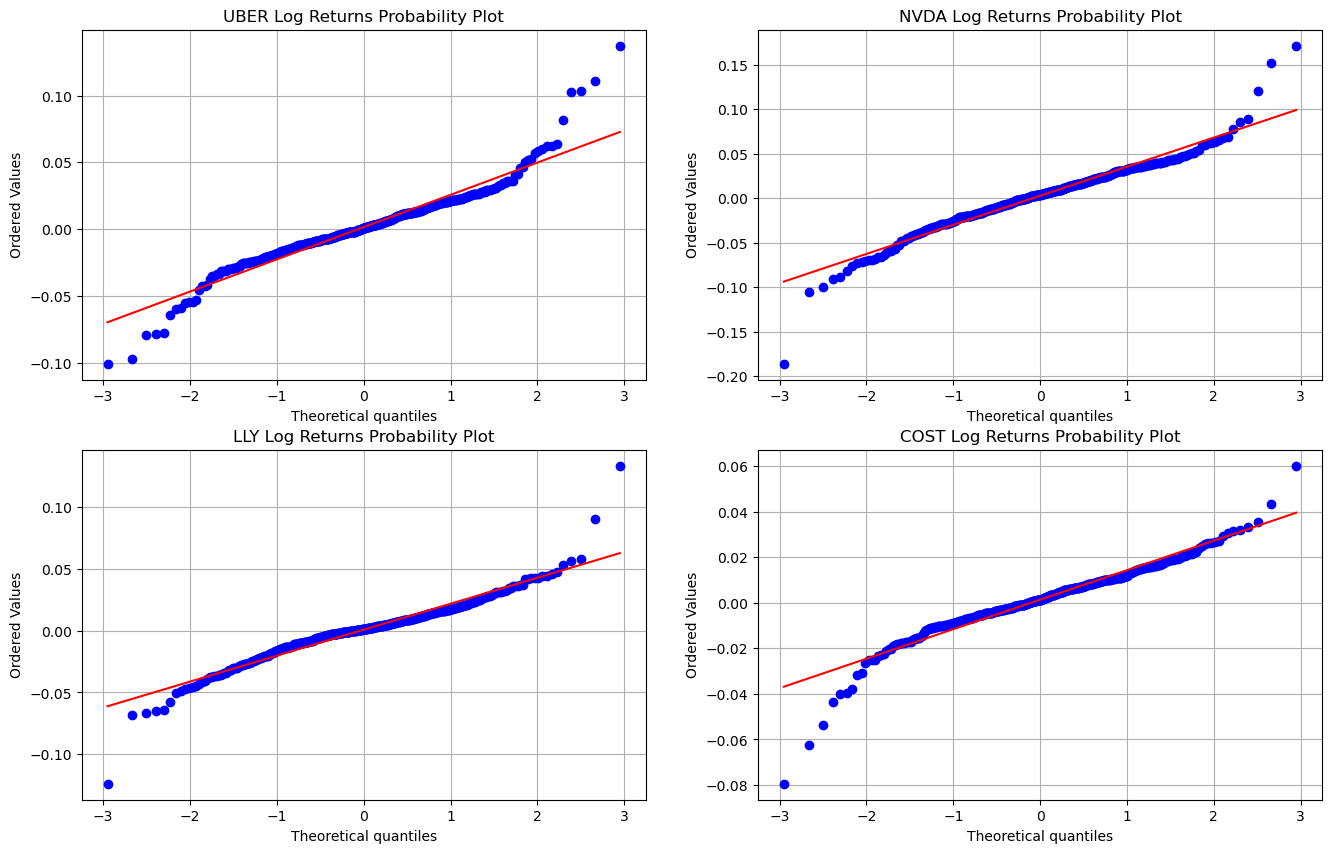

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


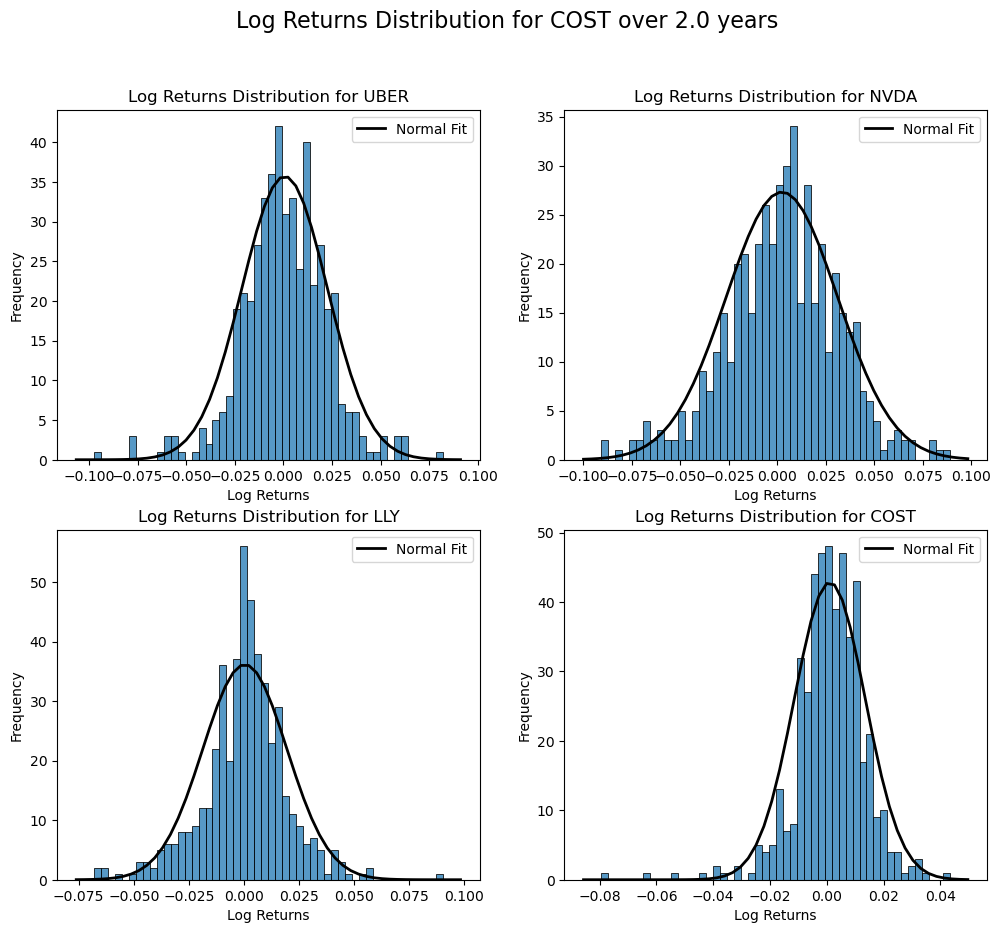

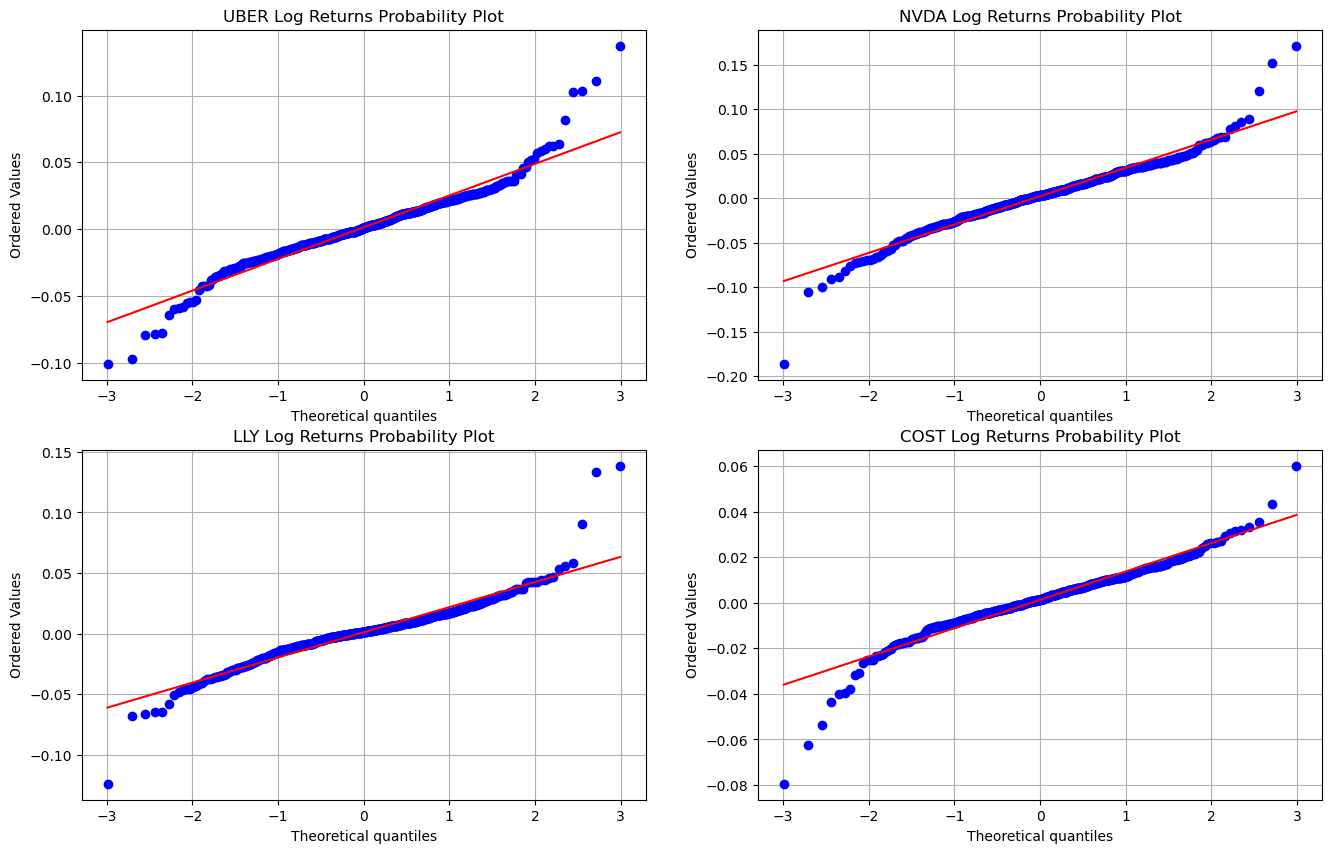

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

In [32]:
for n in range(1,9): 
   # Focusing on shorter periods of trading dates of data to see trends.
    start_date = dt.datetime.today()-dt.timedelta(days = 365 * n/4)
    end_date = dt.datetime.today()

    stock = yf.download(tickers, start = start_date, end = end_date)
    log_returns = np.log(stock['Close'] / stock['Close'].shift(1)).dropna()
    log_returns_typical = log_returns[abs(log_returns) < 0.1].dropna()  # Filtering out extreme log returns to focus on more typical behavior.

    # Fitting a normal distribution to the log returns.
    from scipy.stats import norm

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    for i, ticker in enumerate(tickers):
        ax = axes[i // 2, i % 2]
        sns.histplot(log_returns_typical[ticker], bins=50, ax=ax)

        mu, std = norm.fit(log_returns_typical[ticker])
        xmin, xmax = ax.get_xlim()
        x = np.linspace(xmin, xmax, 50) # Choosing the number of points equal to the number of bins to make the fit over the histogram.
        p = norm.pdf(x, mu, std)
        ax.plot(x, p/p.sum() * len(log_returns_typical), 'k', linewidth=2, label='Normal Fit') # Normalizing the PDF to match the histogram scale.
        ax.legend()

        ax.set_title(f'Log Returns Distribution for {ticker}')
        ax.set_xlabel('Log Returns')
        ax.set_ylabel('Frequency')
        fig.suptitle(f'Log Returns Distribution for {ticker} over {n/4} years', fontsize=16)

    from scipy import stats
    # Create 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    for i, ticker in enumerate(tickers):
        stats.probplot(log_returns[ticker].values, dist="norm", plot=axes[i // 2, i % 2])
        axes[i // 2, i % 2].set_title(f'{ticker} Log Returns Probability Plot')
        axes[i // 2, i % 2].grid(True)

    plt.show()

    for ticker in tickers:
        #Collect p-values of normality tests
        p_ticker=stats.normaltest(log_returns[ticker])[1]

        #Print evidence/non-evidence of normality
        print(f"{ticker} log return distribution: p-value = {p_ticker:.4f}")
        if p_ticker < 0.05:
            print("→ Statistically significant evidence that the data is NOT normally distributed.")
        else:
            print("→ No statistically significant evidence against normality.")

        print('--'*40) 
        print('--'*40) 


One can see an evidence of normality for earlier stages more clearly now.
    
And it's even more apparent in later stages when outliers are filtered out.

Let's try restricting it even more and identify an extreme point as a change of +5% in one trading day, |log_return|<0.05.

[*********************100%***********************]  4 of 4 completed


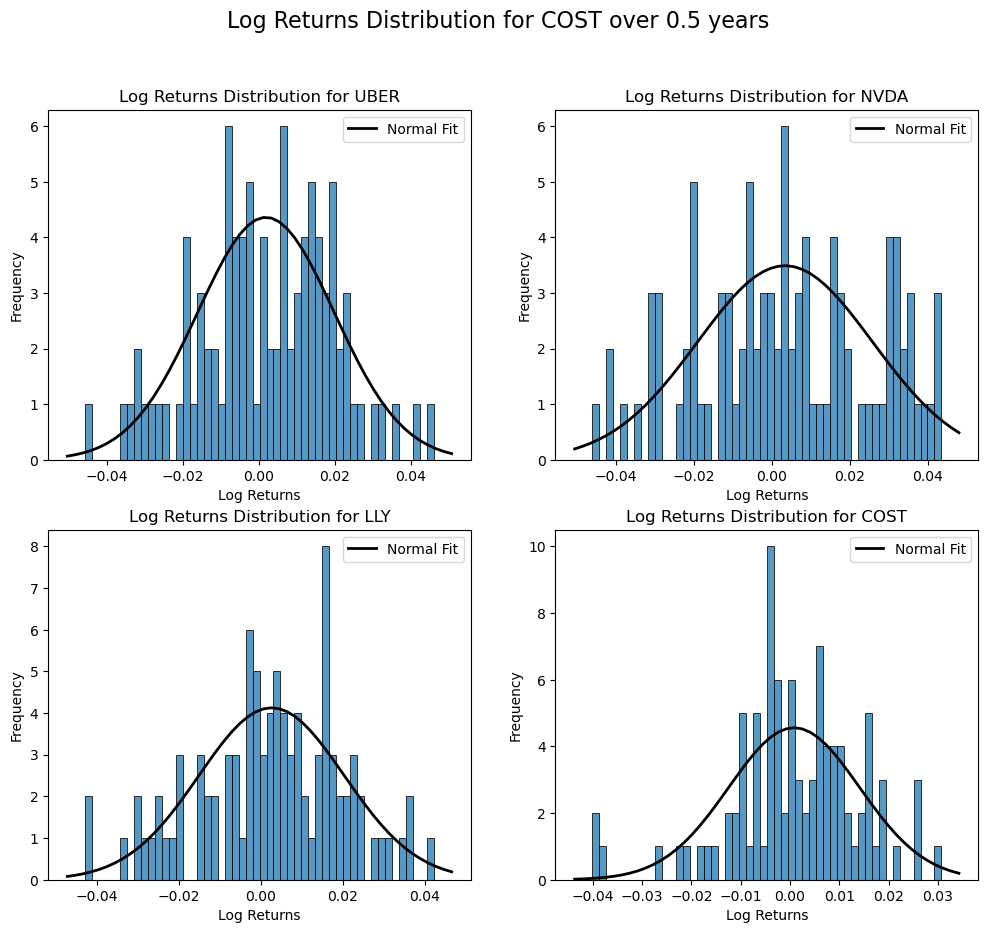

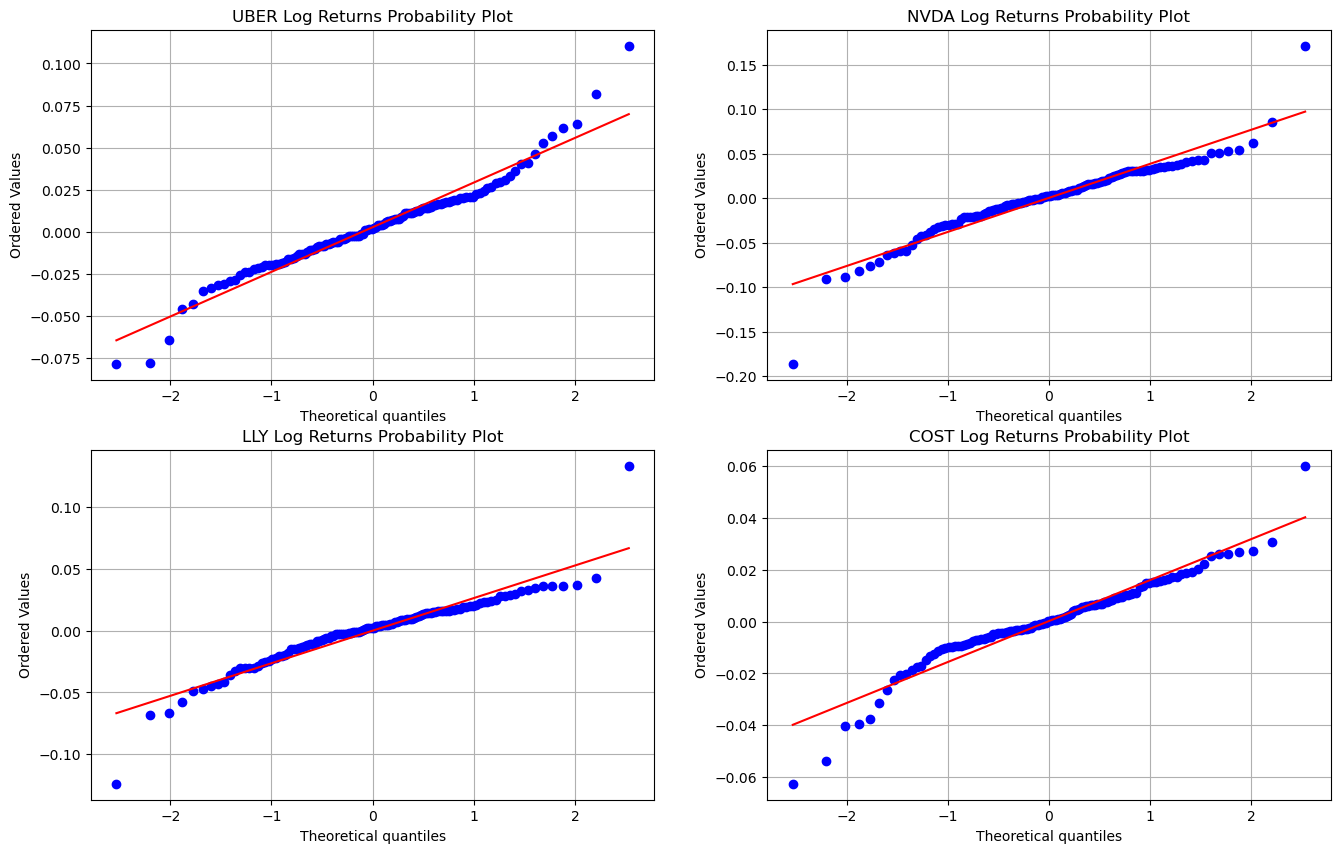

UBER log return distribution: p-value = 0.0005
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


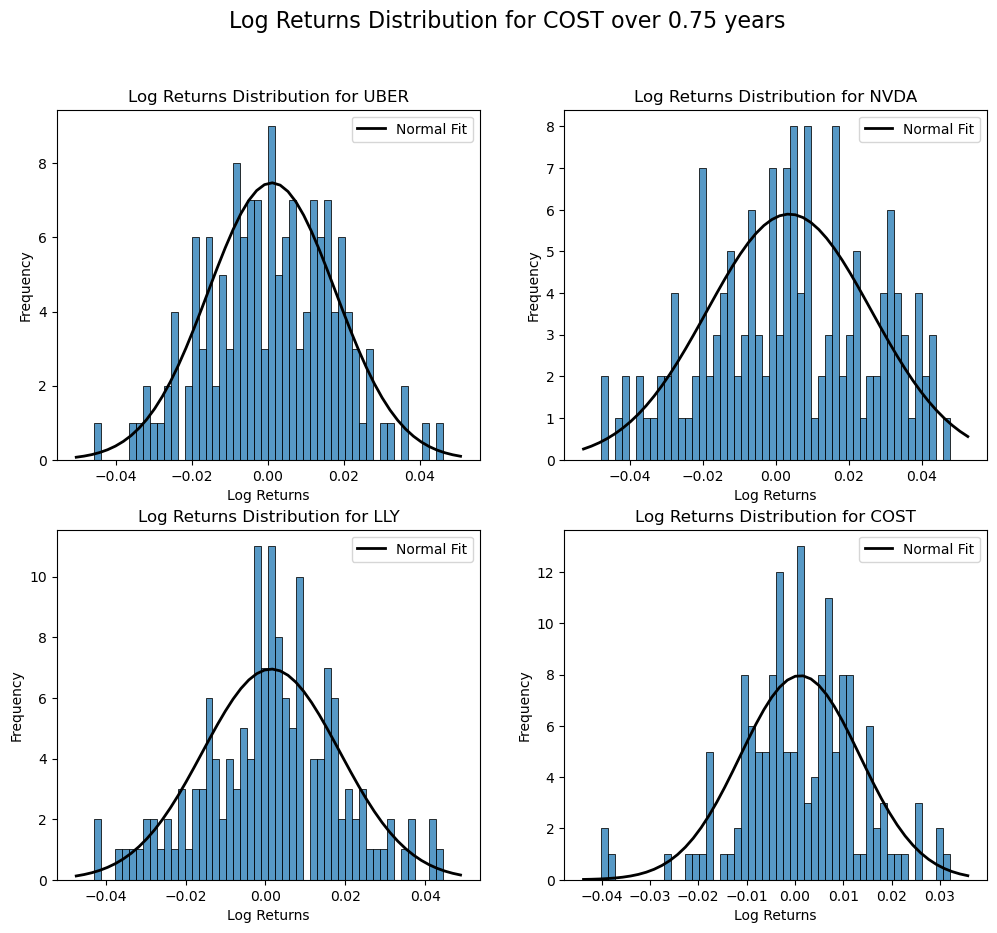

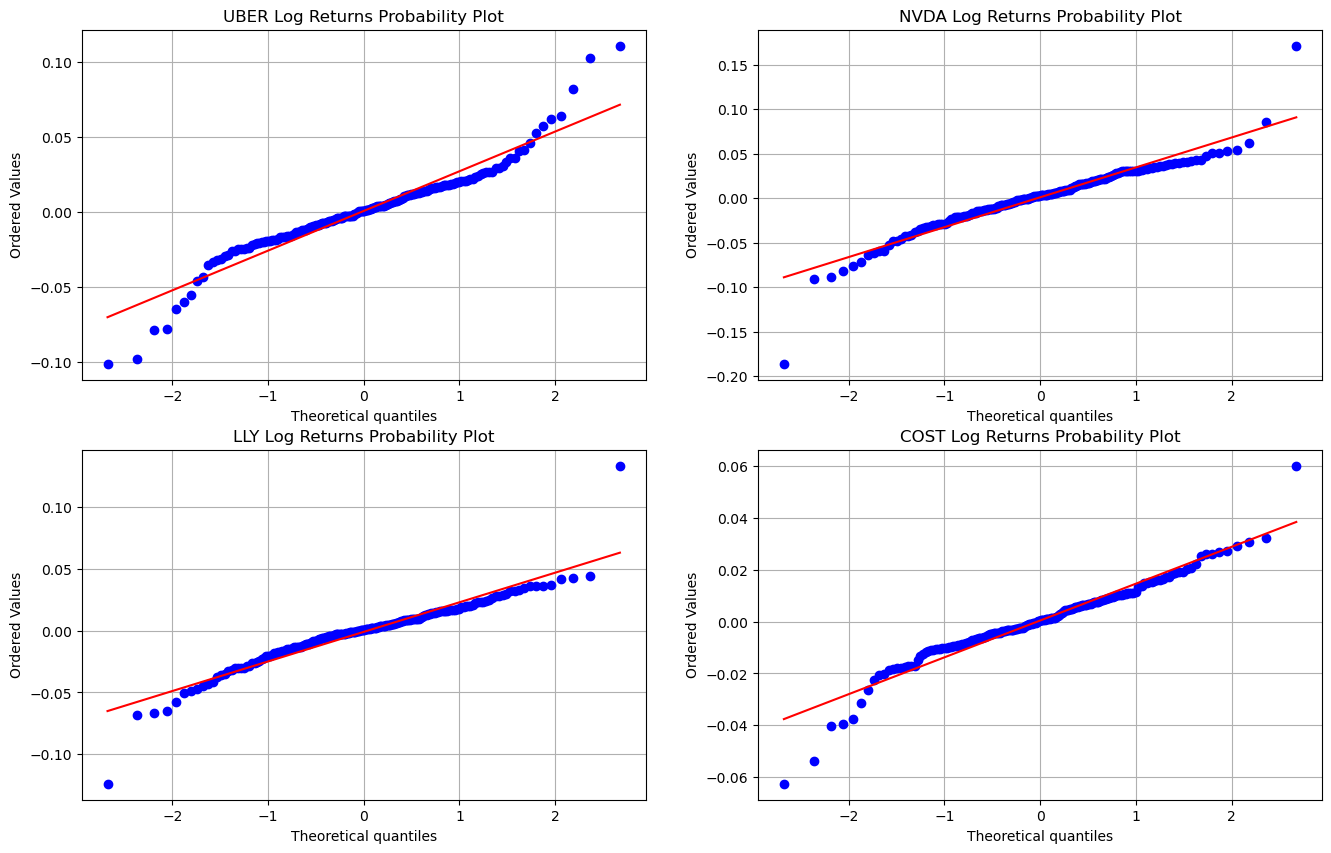

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


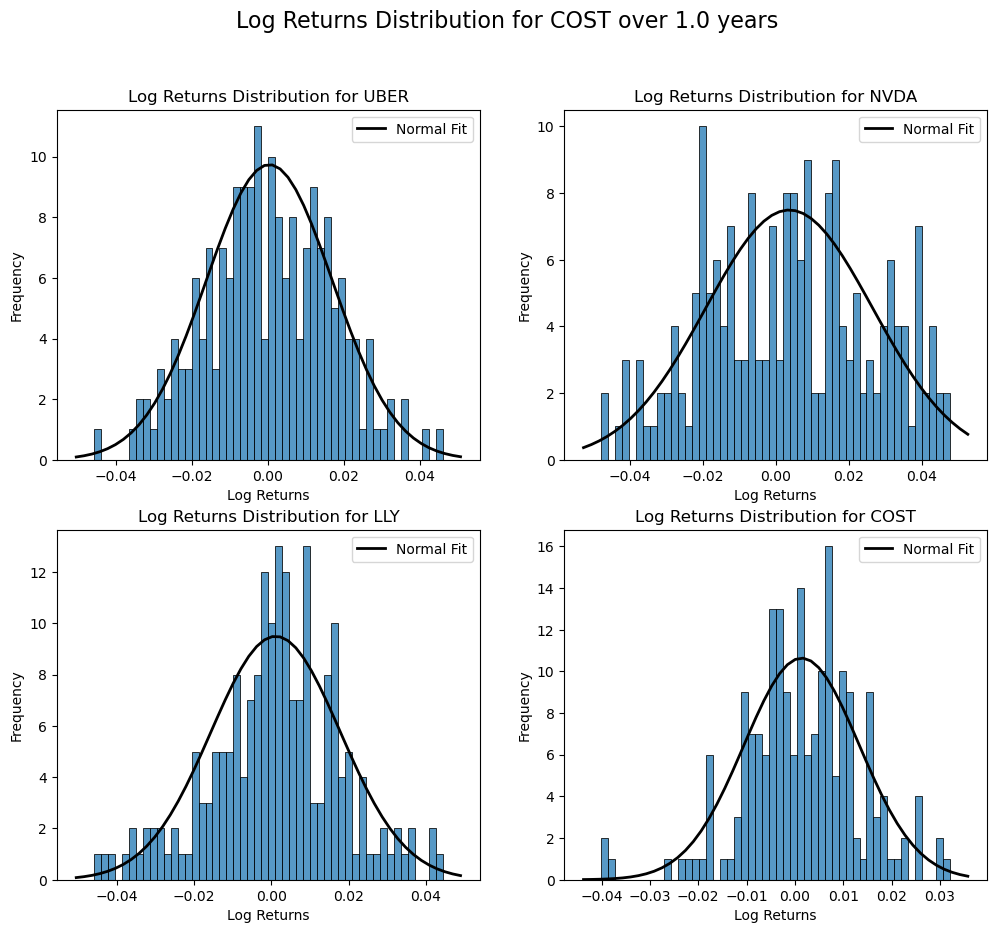

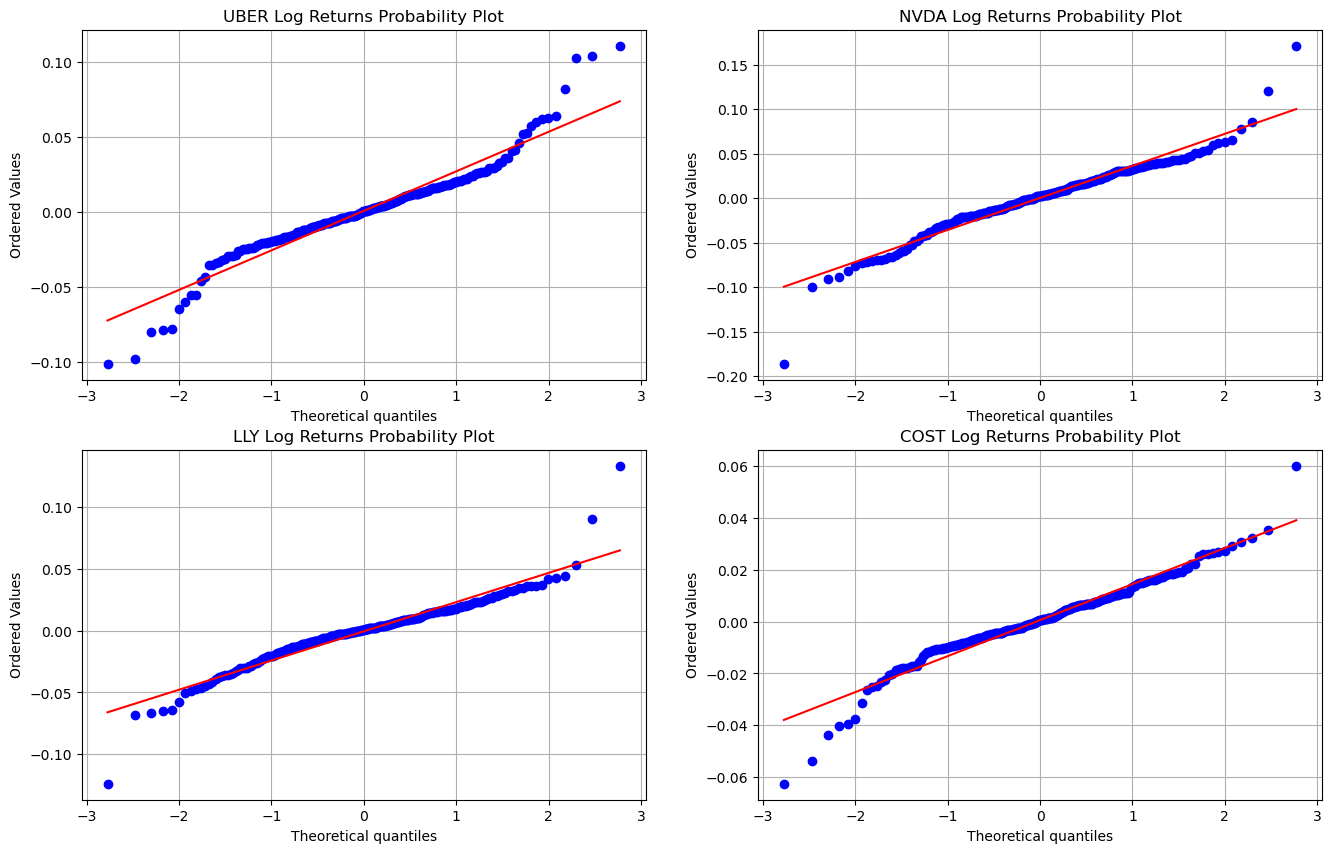

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


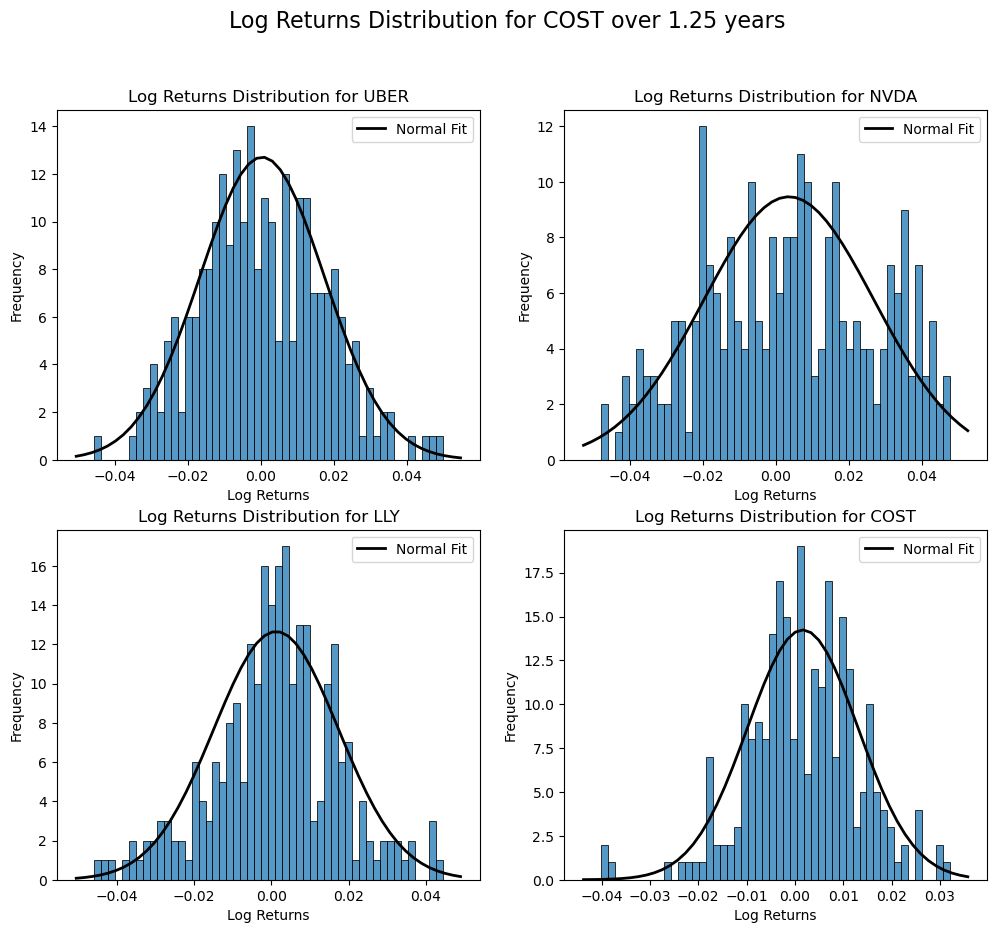

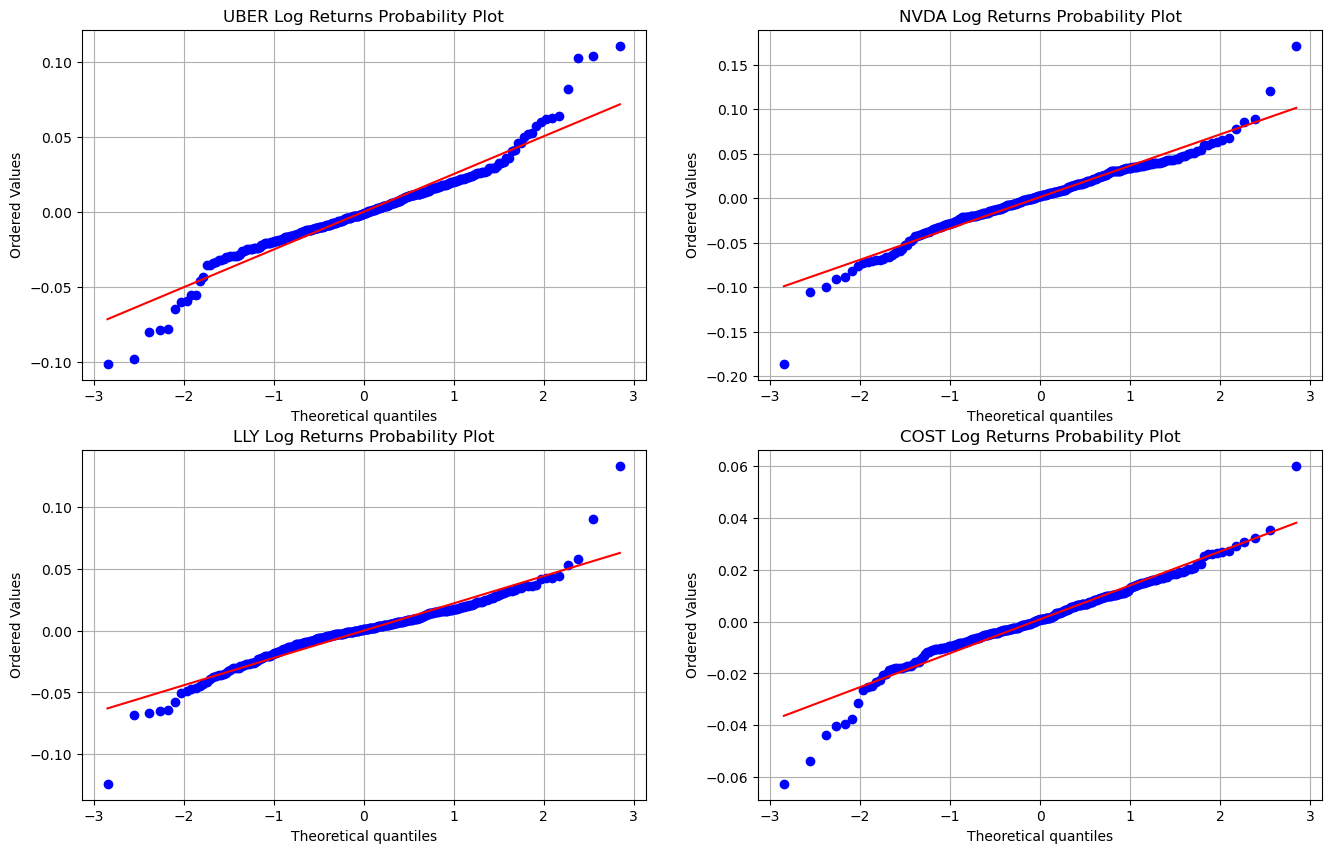

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


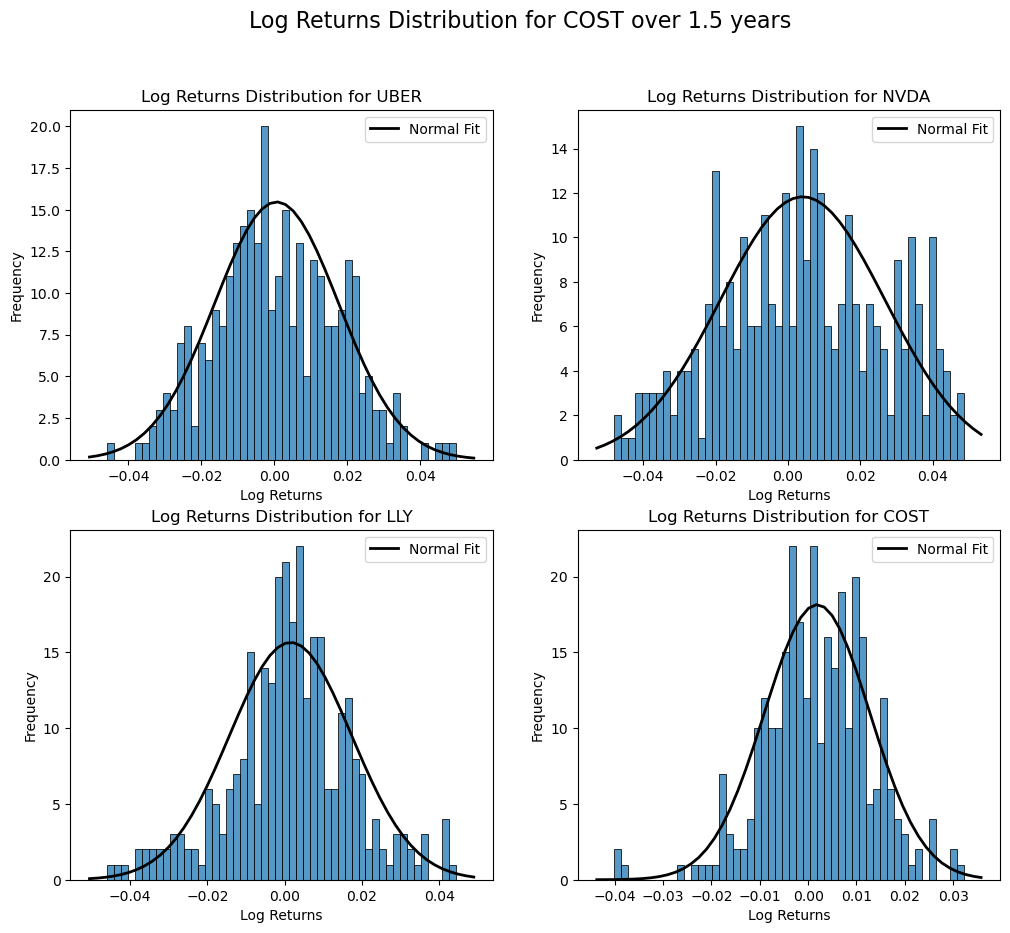

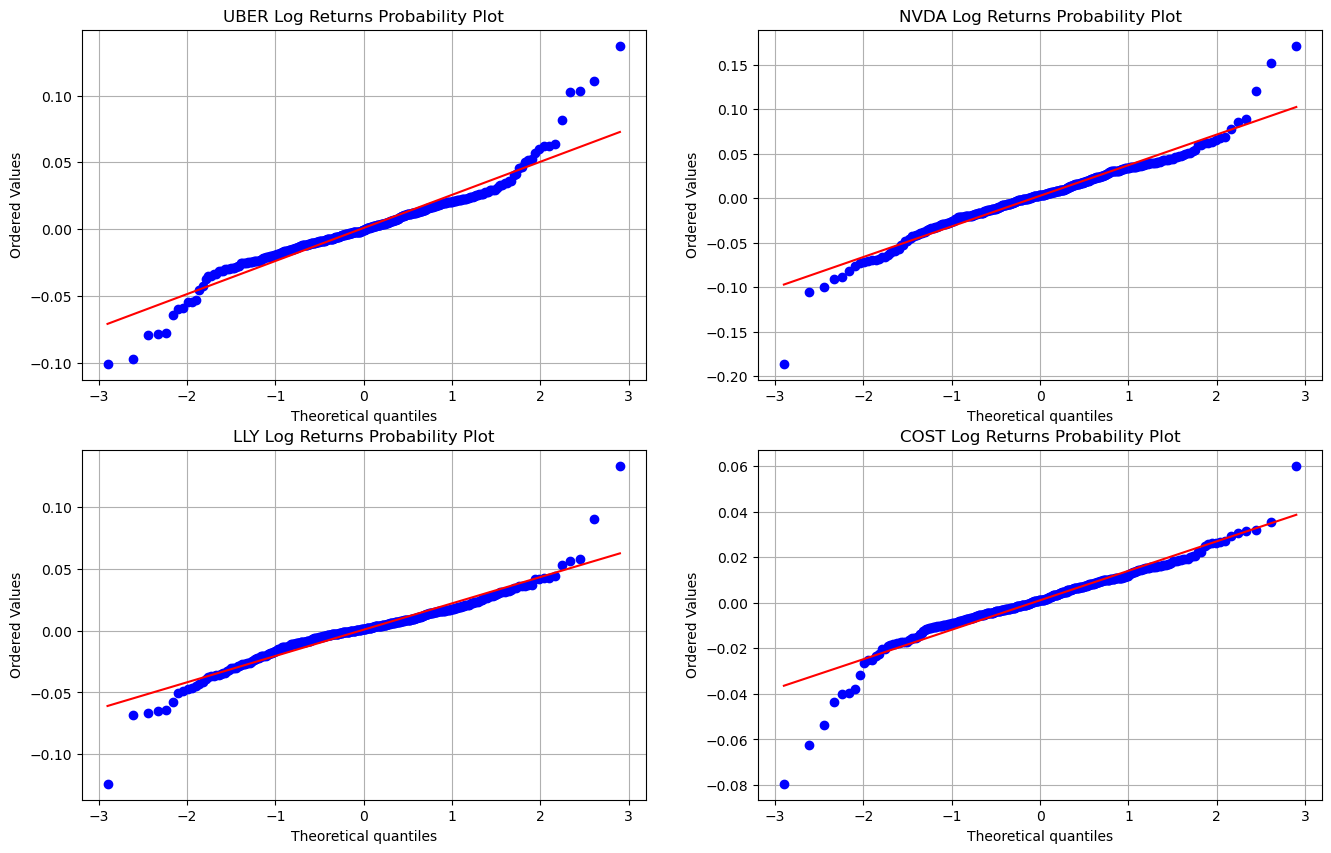

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


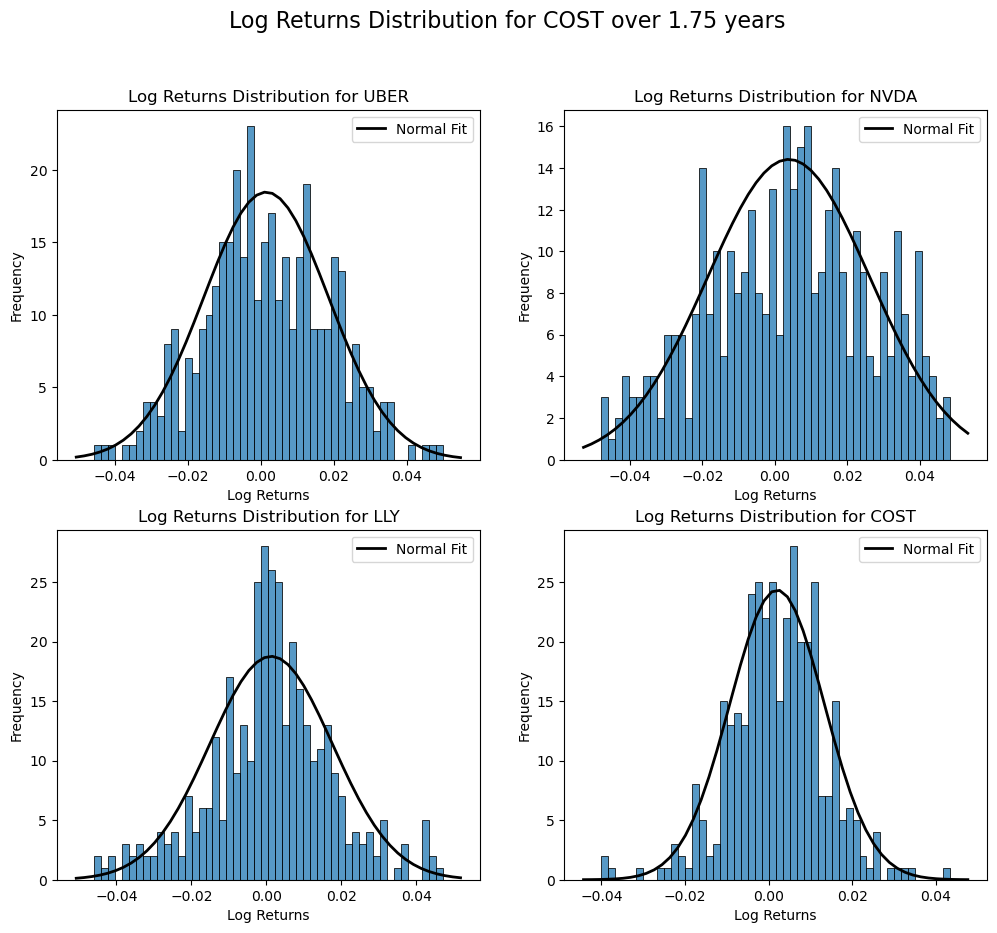

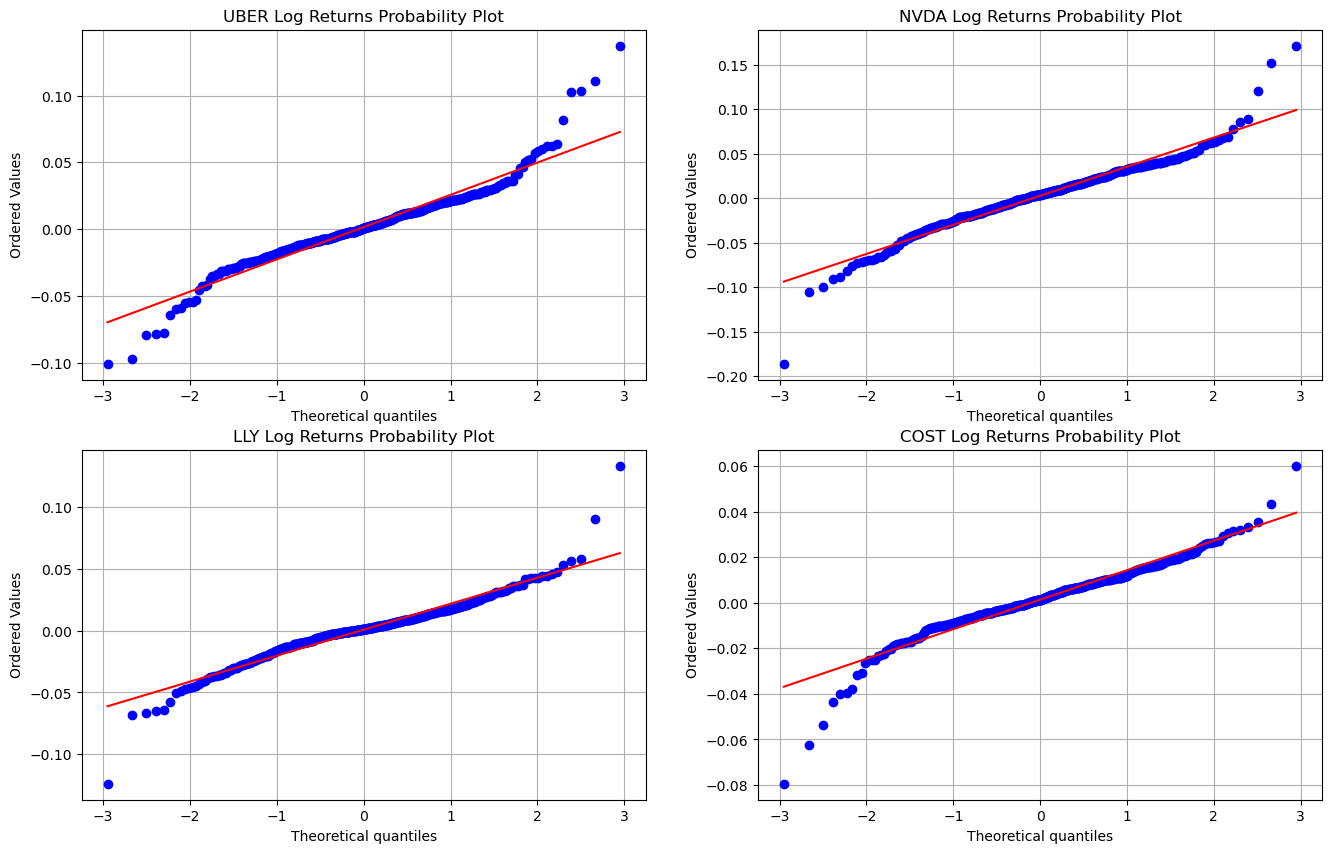

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

[*********************100%***********************]  4 of 4 completed


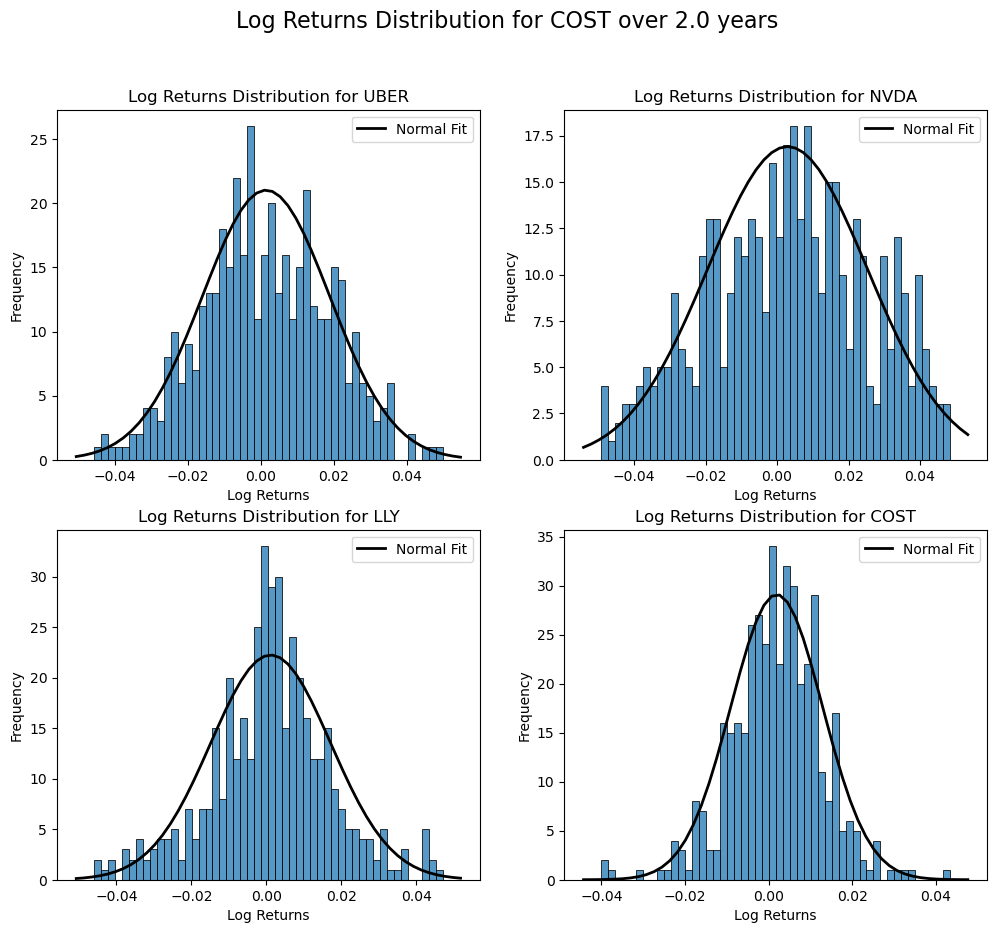

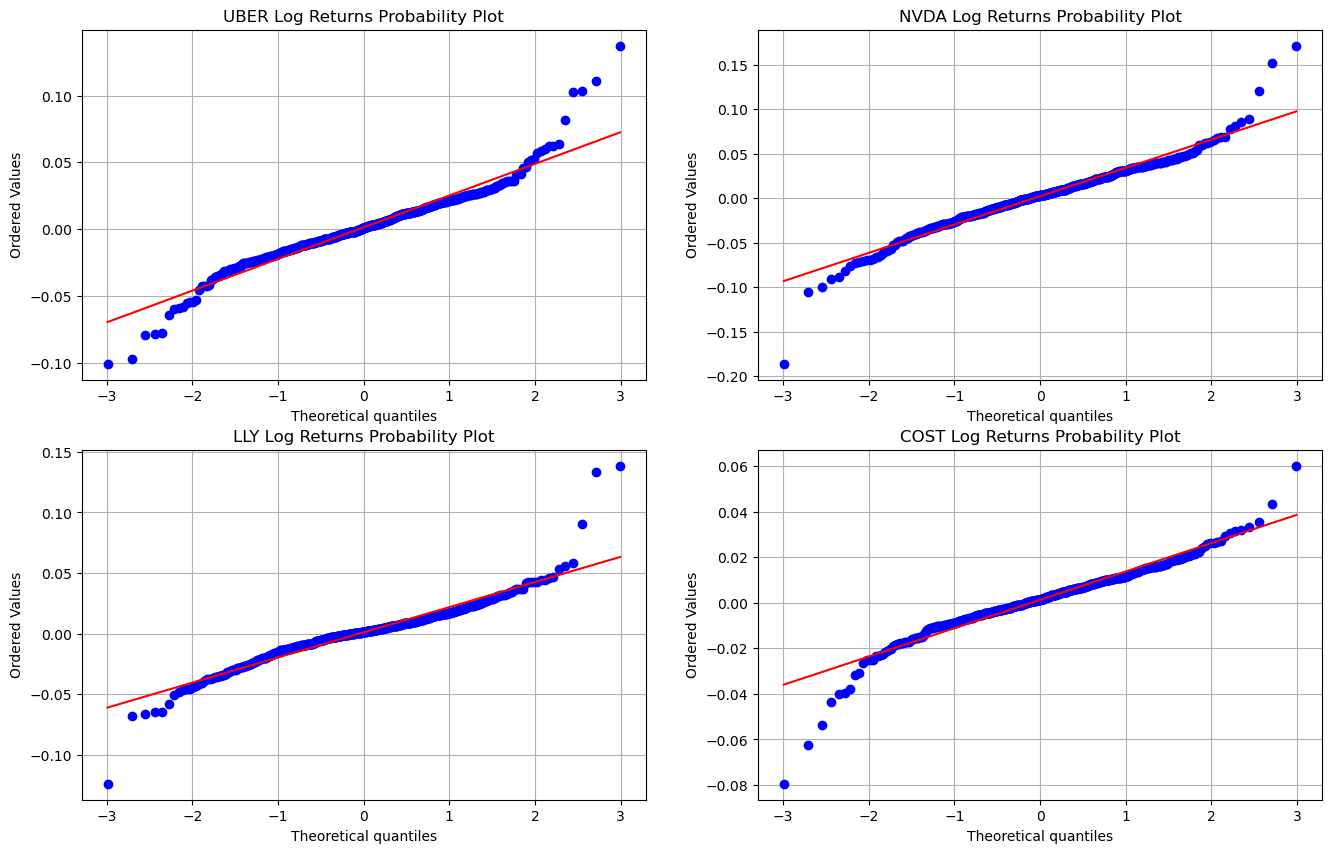

UBER log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LLY log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
COST log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
-------

In [33]:
# Doing a more extreme filtering of log returns to focus on more typical behavior.
for n in range(2,9): 
   # Focusing on shorter periods of trading dates of data to see trends.
    start_date = dt.datetime.today()-dt.timedelta(days = 365 * n/4)
    end_date = dt.datetime.today()

    stock = yf.download(tickers, start = start_date, end = end_date)
    log_returns = np.log(stock['Close'] / stock['Close'].shift(1)).dropna()
    log_returns_typical = log_returns[abs(log_returns) < 0.05].dropna()  # Filtering out extreme log returns to focus on more typical behavior.

    # Fitting a normal distribution to the log returns.
    from scipy.stats import norm

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    for i, ticker in enumerate(tickers):
        ax = axes[i // 2, i % 2]
        sns.histplot(log_returns_typical[ticker], bins=50, ax=ax)

        mu, std = norm.fit(log_returns_typical[ticker])
        xmin, xmax = ax.get_xlim()
        x = np.linspace(xmin, xmax, 50) # Choosing the number of points equal to the number of bins to make the fit over the histogram.
        p = norm.pdf(x, mu, std)
        ax.plot(x, p/p.sum() * len(log_returns_typical), 'k', linewidth=2, label='Normal Fit') # Normalizing the PDF to match the histogram scale.
        ax.legend()

        ax.set_title(f'Log Returns Distribution for {ticker}')
        ax.set_xlabel('Log Returns')
        ax.set_ylabel('Frequency')
        fig.suptitle(f'Log Returns Distribution for {ticker} over {n/4} years', fontsize=16)
    from scipy import stats
    # Create 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    for i, ticker in enumerate(tickers):
        stats.probplot(log_returns[ticker].values, dist="norm", plot=axes[i // 2, i % 2])
        axes[i // 2, i % 2].set_title(f'{ticker} Log Returns Probability Plot')
        axes[i // 2, i % 2].grid(True)

    plt.show()

    for ticker in tickers:
        #Collect p-values of normality tests
        p_ticker=stats.normaltest(log_returns[ticker])[1]

        #Print evidence/non-evidence of normality
        print(f"{ticker} log return distribution: p-value = {p_ticker:.4f}")
        if p_ticker < 0.05:
            print("→ Statistically significant evidence that the data is NOT normally distributed.")
        else:
            print("→ No statistically significant evidence against normality.")

        print('--'*40) 
        print('--'*40) 

This shows more details on which stocks seem to show normal behavior and which ones do not.

Costco and LLY seem to show more normal behavior, while NVDA and UBER show more extreme behavior.

This isn't a surprise since Nvidia and Uber showed huge price increases in the last two years, while LLY and COST have been more stable.

# 3) & 4) A portfolio with stocks that showed normally distributed log returns.

Given the previous observations, we probably need more stable stocks to construct a portfolio that is more likely to follow a normal distribution.

I will use the same stocks from before that showed a normal behavior, i.e., 'LLY', 'COST'. I will also add two more stocks that are known to be stable from my previous mini-project: 'MA', 'BKNG'.

For a touch of volatility, I will keep 'UBER' in the mix.


In [9]:
stable_tickers = ['LLY', 'COST', 'MA', 'BKNG', 'UBER']

# Focusing on two years of trading dates of data since it showed normality in this time range.
start_date = dt.datetime.today()-dt.timedelta(days = 365 * 2)
end_date = dt.datetime.today()

stock = yf.download(stable_tickers, start = start_date, end = end_date)

[*********************100%***********************]  5 of 5 completed


In [10]:
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()
covariance_matrix = 252*((daily_returns).cov())

In [13]:
# Number of assets
n_assets_low = len(stable_tickers)

# Define an initial guess for asset weights (e.g., equal weights)
initial_weights = np.array([1/n_assets_low] * n_assets_low)

# Define weight constraints
#Sum of weights equals 1 
#Allocate at least 3% of capital into each index in stock_symbols
#Do not allocate more than 35% of capital into each index in stock_symbol
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
             {'type': 'ineq', 'fun': lambda weights: min(weights)-.10},
              {'type': 'ineq', 'fun': lambda weights: .30-max(weights)})

# Define the objective function to minimize portfolio variance
def portfolio_volatility(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return portfolio_std_dev

# Run the optimization to find the optimal weights
result = minimize(portfolio_volatility, initial_weights, constraints=constraints)

# Optimal asset weights
optimal_weights = result.x

# Print the optimal weights and expected returns
print("Optimal Asset Weights to minimize volatility:")
for ticker, weight in zip(stable_tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to minimize volatility:
LLY: Weight = 0.1954
COST: Weight = 0.3000
MA: Weight = 0.1046
BKNG: Weight = 0.3000
UBER: Weight = 0.1000


In [14]:
print(f' The optimal volatility subject to the constraints is {result.fun*100:.2f}%')
print(f' The expected Two-year return of the portfolio is {np.sum(optimal_weights * (stock['Close'].iloc[-1]-stock['Close'].iloc[0])/stock['Close'].iloc[0])*100:.2f}%')

 The optimal volatility subject to the constraints is 17.11%
 The expected Two-year return of the portfolio is 84.23%


In [ ]:
# Better than the cases we analyzed in the previous project. 

# 5) Samples of data and their normality.

In [ ]:
# Focusing on 'COST' for example and picking a RANDOM sample of data from the last 2 years.

In [26]:
tickers = ['COST']

# Focusing on two years of trading dates of data.
start_date = dt.datetime.today()-dt.timedelta(days = 365 * 2)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [27]:
log_returns = np.log(stock['Close'] / stock['Close'].shift(1)).dropna()

sample_1 = log_returns.sample(n=100, random_state=42)  # Randomly sample 100 data points
sample_2 = log_returns.sample(n=100, random_state=43)  # Randomly sample another 100 data points
sample_3 = log_returns.sample(n=100, random_state=44)  # Randomly sample another 100 data points
sample_4 = log_returns.sample(n=100, random_state=45)  # Randomly sample another 100 data points
samples = [sample_1, sample_2, sample_3, sample_4]

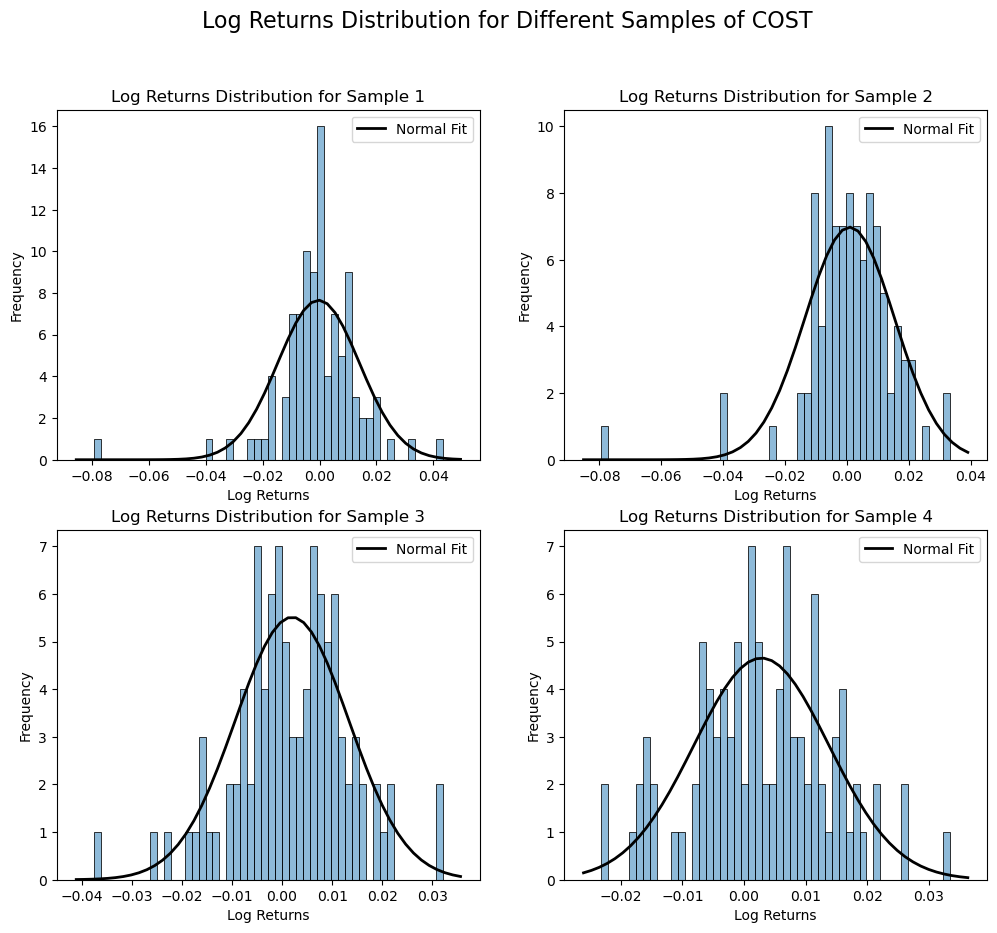

In [29]:
# Fitting a normal distribution to the log returns of different samples.
from scipy.stats import norm

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i in range(len(samples)):
    sample = samples[i]
    ax = axes[i // 2, i % 2]
    sns.histplot(sample, bins=50, ax=ax)

    mu, std = norm.fit(sample)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 50) # Choosing the number of points equal to the number of bins to make the fit over the histogram.
    p = norm.pdf(x, mu, std)
    ax.plot(x, p/p.sum() * len(sample), 'k', linewidth=2, label='Normal Fit') # Normalizing the PDF to match the histogram scale.
    ax.legend()

    ax.set_title(f'Log Returns Distribution for Sample {i+1}')
    fig.suptitle('Log Returns Distribution for Different Samples of COST', fontsize=16)
    ax.set_xlabel('Log Returns')
    ax.set_ylabel('Frequency')

No clear sign of normality in those samples.

### Maybe we need to take out extreme values to see the normality of the distribution?


In [32]:
log_returns = np.log(stock['Close'] / stock['Close'].shift(1)).dropna()
log_returns_typical = log_returns[abs(log_returns) < 0.05].dropna()  # Filtering out extreme log returns to focus on more typical behavior.

sample_1 = log_returns_typical.sample(n=100, random_state=42)  # Randomly sample 100 data points
sample_2 = log_returns_typical.sample(n=100, random_state=43)  # Randomly sample another 100 data points
sample_3 = log_returns_typical.sample(n=100, random_state=44)  # Randomly sample another 100 data points
sample_4 = log_returns_typical.sample(n=100, random_state=45)  # Randomly sample another 100 data points
samples = [sample_1, sample_2, sample_3, sample_4]

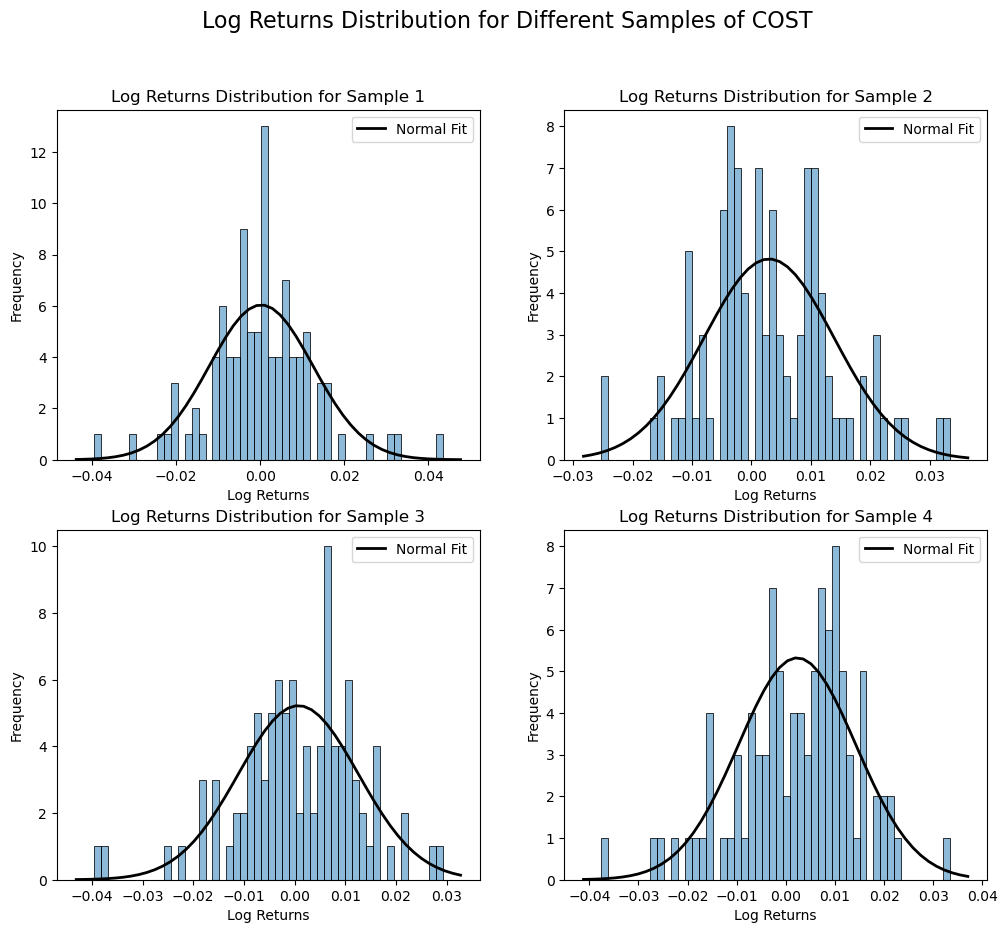

In [33]:
# Fitting a normal distribution to the log returns of different samples.
from scipy.stats import norm

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i in range(len(samples)):
    sample = samples[i]
    ax = axes[i // 2, i % 2]
    sns.histplot(sample, bins=50, ax=ax)

    mu, std = norm.fit(sample)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 50) # Choosing the number of points equal to the number of bins to make the fit over the histogram.
    p = norm.pdf(x, mu, std)
    ax.plot(x, p/p.sum() * len(sample), 'k', linewidth=2, label='Normal Fit') # Normalizing the PDF to match the histogram scale.
    ax.legend()

    ax.set_title(f'Log Returns Distribution for Sample {i+1}')
    fig.suptitle('Log Returns Distribution for Different Samples of COST', fontsize=16)
    ax.set_xlabel('Log Returns')
    ax.set_ylabel('Frequency')

Slightly better, but not perfect normality.

Maybe one shouldn't take a random sample of points, but more of a connected set of points or prices at a specific period.

I think I just picked the worst stock to analyze :"D